## Heritability Analyses

In [14]:
##load libraries
library(ggplot2)
library(ggdendro)
library(reshape2)
library(grid)
library(dplyr)   
library(qvalue)

## Plotting functions below for heatmaps and dot plots

In [15]:
##modified scripts for heatmaps to take full file
##Plotting function for all cell heatmap
heatmap_all_cells_full<- function(plotdata,title){
    #create dataframe for plotting
    enrich.data=plotdata[c(1,5,11,17,23,29,35,41,47,53)]
    sig.data=plotdata[c(1,7,13,19,25,31,37,43,49,55)]
    #enrich.data=plotdata[c(1,2,4,6,8,10,12,14,16,18)]
    #sig.data=plotdata[c(1,3,5,7,9,11,13,15,17,19)]
    lab=c("disease","Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC")
    #lab=c("disease","Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells")
    colnames(enrich.data)=lab
    colnames(sig.data)=lab
    #sig=melt(data = sig.data, id.vars = "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells"),value.name = "pvalue",variable.name="cell")
    #enrich=melt(data = enrich.data, id.vars= "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells"), value.name = "enrichment",variable.name="cell")
    sig=melt(data = sig.data, id.vars = "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "pvalue",variable.name="cell")
    enrich=melt(data = enrich.data, id.vars= "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"), value.name = "enrichment",variable.name="cell")
    
    
    #merge dfs
    df=merge(enrich,sig)
    
    #cluster data
    den=as.dendrogram(hclust( dist(plotdata, method = "euclidean"), method = "ward.D" ))
    ordr=order.dendrogram(den)
    dendro.plot <- ggdendrogram(data = den, labels=FALSE, leaf_labels=FALSE,rotate = TRUE,axes=F)
    
    #label significance 
    df$star <- cut(df$pvalue, breaks=c(-Inf, 0.01, 0.05, 0.1, Inf), label=c("***", "**", "*", ""))
    #df$star <- cut(df$pvalue, breaks=c(-Inf, 0.0000000002, 0.00000002, 0.000002, Inf), label=c("***", "**", "*", ""))
    
    df_clust=df[ordr,]
    df$disease <-factor(x=df$disease, levels=enrich.data$disease[ordr],ordered=TRUE)
    #df$disease <-factor(x=df$disease, levels=enrich.data$disease[ordr],ordered=TRUE)
    
    #plot
    grid.newpage()
    heatmap.plot=ggplot(data = df, aes(x = cell, y = disease)) +ggtitle(title)+
    geom_tile(aes(fill = enrichment)) +scale_fill_gradient(low = "blue", high = "red")+labs(fill = "Enrichment")+geom_text(aes(label=star), color="black", size=3)+theme(axis.text.x=element_text(angle=90,hjust=1))
    
    #geom_tile(aes(fill = enrichment)) +scale_fill_gradient(low = "blue", high = "red",limits=c(-50,50))+labs(fill = "Enrichment")+geom_text(aes(label=star), color="black", size=3)+theme(axis.text.x=element_text(angle=90,hjust=1))
    
    
    print(heatmap.plot, vp = viewport(x = 0.4, y = 0.5, width = 0.8, height = 1.0),labels=FALSE)
    plot(dendro.plot, axes=FALSE,vp = viewport(x = 0.9, y = 0.56, width = 0.2, height = 0.88))
}


## Enrichment dotplot script

In [16]:
# dot plots looking at enrichment SLE vs immvar and annotate significance
dotplots_enrich<-function(plotdata1,plotdata2,dis,title){
    #plotdata1=SLE.IRF4.full
    #plotdata2=immvar.IRF4.full
    enrich.data1=plotdata1[c(1,5,11,17,23,29,35,41,47,53)]
    enrich.data2=plotdata2[c(1,5,11,17,23,29,35,41,47,53)]
    sd.data1=plotdata1[c(1,6,12,18,24,30,36,42,48,54)]
    sd.data2=plotdata2[c(1,6,12,18,24,30,36,42,48,54)]
    sig.data1=plotdata1[c(1,7,13,19,25,31,37,43,49,55)]
    sig.data2=plotdata2[c(1,7,13,19,25,31,37,43,49,55)]
    
    
    lab=c("disease","Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC")
    colnames(enrich.data1)=lab    
    enrich.data1$status="SLE"
    colnames(sd.data1)=lab    
    sd.data1$status="SLE"
    colnames(sig.data1)=lab    
    sig.data1$status="SLE"
    #head(enrich.data1)
    colnames(enrich.data2)=lab    
    enrich.data2$status="immvar"
    colnames(sd.data2)=lab    
    sd.data2$status="immvar"
    colnames(sig.data2)=lab    
    sig.data2$status="immvar"
    #head(enrich.data2)
    
    enrich.all=rbind(enrich.data1,enrich.data2)
    sd.all=rbind(sd.data1,sd.data2)
    sig.all=rbind(sig.data1,sig.data2)
    
    #enrich.all
    enrich=melt(data = enrich.all, id.vars = c("disease","status"), measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "enrich",variable.name="cell")
    #head(enrich)
    sd=melt(data = sd.all, id.vars = c("disease","status"), measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "sd",variable.name="cell")
    
    sig=melt(data = sig.all, id.vars = c("disease","status"), measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "sig",variable.name="cell")
   #head(sd)
    

    enrich$sd=sd$sd
    enrich$sig=sig$sig
    enrich$star <- cut(enrich$sig, breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))
   
    
    #head(enrich)
    lup=filter(enrich, disease==dis)
    #head(lup)

    #rownames(lup) <- lup$disease
    #lup[,1] <- NULL
    #lup

    ggplot(lup,aes(x = cell, y = enrich,color=status)) + geom_pointrange(aes(ymin=enrich-sd, ymax=enrich+sd), position = position_dodge(0.5))+ggtitle(title)+coord_flip()+geom_text(aes(label=star),  color="black",size=5,position = position_dodge(width = 0.5))
}



## H2 dotplot script

In [18]:
#dot plots looking at heritability SLE vs immvar and annotate significance
dotplots_h2<-function(plotdata1,plotdata2,dis,title){
    #plotdata1=SLE.IRF4.full
    #plotdata2=immvar.IRF4.full
    h2.data1=plotdata1[c(1,3,9,15,21,27,33,39,45,51)]
    h2.data2=plotdata2[c(1,3,9,15,21,27,33,39,45,51)]
    sd.data1=plotdata1[c(1,4,10,16,22,28,34,40,46,52)]
    sd.data2=plotdata2[c(1,4,10,16,22,28,34,40,46,52)]
    #sig.data1=plotdata1[c(1,7,13,19,25,31,37,43,49,55)]
    #sig.data2=plotdata2[c(1,7,13,19,25,31,37,43,49,55)]
    
    
    lab=c("disease","Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC")
    colnames(h2.data1)=lab    
    h2.data1$status="SLE"
    colnames(sd.data1)=lab    
    sd.data1$status="SLE"
    #colnames(sig.data1)=lab    
    #sig.data1$status="SLE"
    head(h2.data1)
    colnames(h2.data2)=lab    
    h2.data2$status="immvar"
    colnames(sd.data2)=lab    
    sd.data2$status="immvar"
    #colnames(sig.data2)=lab    
    #sig.data2$status="immvar"
    #head(enrich.data2)
    
    h2.all=rbind(h2.data1,h2.data2)
    sd.all=rbind(sd.data1,sd.data2)
    #sig.all=rbind(sig.data1,sig.data2)
    
    #enrich.all
    h2=melt(data = h2.all, id.vars = c("disease","status"), measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "h2",variable.name="cell")
    #head(enrich)
    sd=melt(data = sd.all, id.vars = c("disease","status"), measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "sd",variable.name="cell")
    
    #sig=melt(data = sig.all, id.vars = c("disease","status"), measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "sig",variable.name="cell")
    #head(sd)
    

    h2$sd=sd$sd
    #enrich$sig=sig$sig
    #enrich$star <- cut(enrich$sig, breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))
   
    
    #head(enrich)
    lup=filter(h2, disease==dis)
    #head(lup)

    #rownames(lup) <- lup$disease
    #lup[,1] <- NULL
    #print(lup)

    ggplot(lup,aes(x = cell, y = h2,color=status)) + geom_pointrange(aes(ymin=h2-sd, ymax=h2+sd), position = position_dodge(0.5))+ggtitle(title)+coord_flip()
}


## single cell type heatmaps

## high overlap cell type dotplot enrichment

In [19]:
# dot plots looking at enrichment SLE vs immvar and annotate significance
dotplots_enrich_single<-function(plotdata1,plotdata2,dis,title){
    #plotdata1=SLE.IRF4.full
    #plotdata2=immvar.IRF4.full
    enrich.data1=plotdata1[c(1,5,11,17)]
    enrich.data2=plotdata2[c(1,5,11,17)]
    sd.data1=plotdata1[c(1,6,12,18)]
    sd.data2=plotdata2[c(1,6,12,18)]
    sig.data1=plotdata1[c(1,7,13,19)]
    sig.data2=plotdata2[c(1,7,13,19)]
    
    
    lab=c("disease","CD14+.Monocytes","CD4.T.cells","PBMC")
    colnames(enrich.data1)=lab    
    enrich.data1$status="SLE"
    colnames(sd.data1)=lab    
    sd.data1$status="SLE"
    colnames(sig.data1)=lab    
    sig.data1$status="SLE"
    #head(enrich.data1)
    colnames(enrich.data2)=lab    
    enrich.data2$status="immvar"
    colnames(sd.data2)=lab    
    sd.data2$status="immvar"
    colnames(sig.data2)=lab    
    sig.data2$status="immvar"
    #head(enrich.data2)
    
    enrich.all=rbind(enrich.data1,enrich.data2)
    sd.all=rbind(sd.data1,sd.data2)
    sig.all=rbind(sig.data1,sig.data2)
    
    #enrich.all
    enrich=melt(data = enrich.all, id.vars = c("disease","status"), measure.vars = c("CD14+.Monocytes","CD4.T.cells","PBMC"),value.name = "enrich",variable.name="cell")
    #head(enrich)
    sd=melt(data = sd.all, id.vars = c("disease","status"), measure.vars = c("CD14+.Monocytes","CD4.T.cells","PBMC"),value.name = "sd",variable.name="cell")
    
    sig=melt(data = sig.all, id.vars = c("disease","status"), measure.vars = c("CD14+.Monocytes","CD4.T.cells","PBMC"),value.name = "sig",variable.name="cell")
   #head(sd)
    

    enrich$sd=sd$sd
    enrich$sig=sig$sig
    enrich$star <- cut(enrich$sig, breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))
   
    
    #head(enrich)
    lup=filter(enrich, disease==dis)
    #head(lup)

    #rownames(lup) <- lup$disease
    #lup[,1] <- NULL
    #lup

    ggplot(lup,aes(x = cell, y = enrich,color=status)) + geom_pointrange(aes(ymin=enrich-sd, ymax=enrich+sd), position = position_dodge(0.5))+ggtitle(title)+coord_flip()+geom_text(aes(label=star),  color="black",size=5,position = position_dodge(width = 0.5))
}


## high overlap cell type dotplot H2

In [20]:
#dot plots looking at heritability SLE vs immvar and annotate significance
dotplots_h2_single<-function(plotdata1,plotdata2,dis,title){
    #plotdata1=SLE.IRF4.full
    #plotdata2=immvar.IRF4.full
    h2.data1=plotdata1[c(1,3,9,15)]
    h2.data2=plotdata2[c(1,3,9,15)]
    sd.data1=plotdata1[c(1,4,10,16)]
    sd.data2=plotdata2[c(1,4,10,16)]
    #sig.data1=plotdata1[c(1,7,13,19,25,31,37,43,49,55)]
    #sig.data2=plotdata2[c(1,7,13,19,25,31,37,43,49,55)]
    
    
    lab=c("disease","CD14+.Monocytes","CD4.T.cells","PBMC")
    colnames(h2.data1)=lab    
    h2.data1$status="SLE"
    colnames(sd.data1)=lab    
    sd.data1$status="SLE"
    #colnames(sig.data1)=lab    
    #sig.data1$status="SLE"
    head(h2.data1)
    colnames(h2.data2)=lab    
    h2.data2$status="immvar"
    colnames(sd.data2)=lab    
    sd.data2$status="immvar"
    #colnames(sig.data2)=lab    
    #sig.data2$status="immvar"
    #head(enrich.data2)
    
    h2.all=rbind(h2.data1,h2.data2)
    sd.all=rbind(sd.data1,sd.data2)
    #sig.all=rbind(sig.data1,sig.data2)
    
    #enrich.all
    h2=melt(data = h2.all, id.vars = c("disease","status"), measure.vars = c("CD14+.Monocytes","CD4.T.cells","PBMC"),value.name = "h2",variable.name="cell")
    #head(enrich)
    sd=melt(data = sd.all, id.vars = c("disease","status"), measure.vars = c("CD14+.Monocytes","CD4.T.cells","PBMC"),value.name = "sd",variable.name="cell")
    
    #sig=melt(data = sig.all, id.vars = c("disease","status"), measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "sig",variable.name="cell")
    #head(sd)
    

    h2$sd=sd$sd
    #enrich$sig=sig$sig
    #enrich$star <- cut(enrich$sig, breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))
   
    
    #head(enrich)
    lup=filter(h2, disease==dis)
    #head(lup)

    #rownames(lup) <- lup$disease
    #lup[,1] <- NULL
    #print(lup)

    ggplot(lup,aes(x = cell, y = h2,color=status)) + geom_pointrange(aes(ymin=h2-sd, ymax=h2+sd), position = position_dodge(0.5))+ggtitle(title)+coord_flip()
}

## Load data

In [119]:
#load full h2 results for disease specific, cell type specific eQTLs that intersect with IRF chip peaks
#SLE.IRF1.full=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/IRF1/SLE.IRF1.all.h2.results.txt",header=TRUE)
#SLE.IRF1.full

##IRF4 intersected eQTLs
SLE.IRF4.full=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/IRF4/SLE.IRF4.all.h2.results.txt",header=TRUE)
immvar.IRF4.full=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/IRF4/immvar.IRF4.all.h2.results.txt",header=TRUE)

##IRF1 intersected eQTLs
SLE.IRF1.full=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/IRF1/SLE.IRF1.all.h2.results.txt",header=TRUE)
immvar.IRF1.full=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/IRF1/immvar.IRF1.all.h2.results.txt",header=TRUE)

##all results eQTLs
SLE.all_01=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/SLE.all.h2.results.fdr0.1.txt",header=TRUE)
immvar.all_01=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/immvar.all.h2.results.fdr0.1.txt",header=TRUE)

SLE.all_02=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/SLE.all.h2.results.fdr0.2.txt",header=TRUE)
immvar.all_02=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/immvar.all.h2.results.fdr0.2.txt",header=TRUE)

SLE.all_05=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/SLE.all.h2.results.fdr0.5.txt",header=TRUE)
immvar.all_05=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/immvar.all.h2.results.fdr0.5.txt",header=TRUE)


SLE.all.meta=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/SLE.meta.no.PBMC.fdr0.1.all.h2.final.txt",header=FALSE)
immvar.all.meta=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/immvar.meta.no.PBMC.fdr0.1.all.txt",header=TRUE)

SLE.1MB=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/SLE.1MB.fdr0.1.all.h2.final.txt",header=TRUE)


SLE.1MB.nomP=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/SLE.1MB.fdr0.1.nom_p.all.h2.final.txt",header=TRUE)
immvar.1MB.nomP=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/immvar.1MB.fdr0.1.nom_p.all.h2.final.txt",header=TRUE)

SLE.joint.1MB.nomP=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/SLE.joint.all.h2.final.txt",header=TRUE)

SLE.joint.1MB.nomP.WB=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/SLE.joint.WB.all.h2.final.txt",header=TRUE)


#SLE.all
#print(cbind(SLE.all$Disease, SLE.all$CD14..Monocytes.Enrichment))
      
#SLE_cells=read.table("/Users/student/Documents/YeLab/Lupus/all_h2/sle.SLE.cell.all.h2.results.fdr0.1.txt")
#SLE_cells
print(SLE.all_01$Disease)
#print(immvar.all_01$FCGR3A..Monocytes.Enrichment)
#print(filter(SLE.all, Disease=="PASS_Lupus"))
#print(filter(immvar.all, Disease=="PASS_Lupus"))

#zero FCGR3A in immvar
SLE.all_01$FCGR3A..Monocytes.Enrichment=rep(0,28)
SLE.all_01$FCGR3A..Monocytes.Prop._h2=rep(0,28)
immvar.all_01$FCGR3A..Monocytes.Enrichment=rep(0,28)
immvar.all_01$FCGR3A..Monocytes.Prop._h2=rep(0,28)
#immvar.all_01$Megakaryocytes.Enrichment_std_error=rep(0,28)
#immvar.all_01$Megakaryocytes.Prop._h2_std_error=rep(0,28)

#immvar.all_02$FCGR3A..Monocytes.Enrichment=rep(0,28)
#immvar.all_02$FCGR3A..Monocytes.Prop._h2=rep(0,28)
#immvar.all_02$Megakaryocytes.Enrichment_std_error=rep(0,28)
#immvar.all_02$Megakaryocytes.Prop._h2_std_error=rep(0,28)

#immvar.all_05$FCGR3A..Monocytes.Enrichment=rep(0,28)
#immvar.all_05$FCGR3A..Monocytes.Prop._h2=rep(0,28)
#immvar.all_05$Megakaryocytes.Enrichment_std_error=rep(0,28)
#immvar.all_05$Megakaryocytes.Prop._h2_std_error=rep(0,28)

 [1] PASS_Alzheimer                 PASS_Anorexia                 
 [3] PASS_Autism                    PASS_Bipolar_Disorder         
 [5] PASS_BMI1                      PASS_Celiac                   
 [7] PASS_Coronary_Artery_Disease   PASS_Crohns_Disease           
 [9] PASS_DS                        PASS_Ever_Smoked              
[11] PASS_Fasting_Glucose           PASS_HDL                      
[13] PASS_Height1                   PASS_IBD                      
[15] PASS_LDL                       PASS_Lupus                    
[17] PASS_Multiple_sclerosis        PASS_Neuroticism              
[19] PASS_Primary_biliary_cirrhosis PASS_Rheumatoid_Arthritis     
[21] PASS_Schizophrenia             PASS_SWB                      
[23] PASS_Triglycerides             PASS_Type_1_Diabetes          
[25] PASS_Type_2_Diabetes           PASS_Ulcerative_Colitis       
[27] PASS_Years_of_Education1       PASS_Years_of_Education2      
28 Levels: PASS_Alzheimer PASS_Anorexia PASS_Autism ... PASS_Y

## Call plotting scripts

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

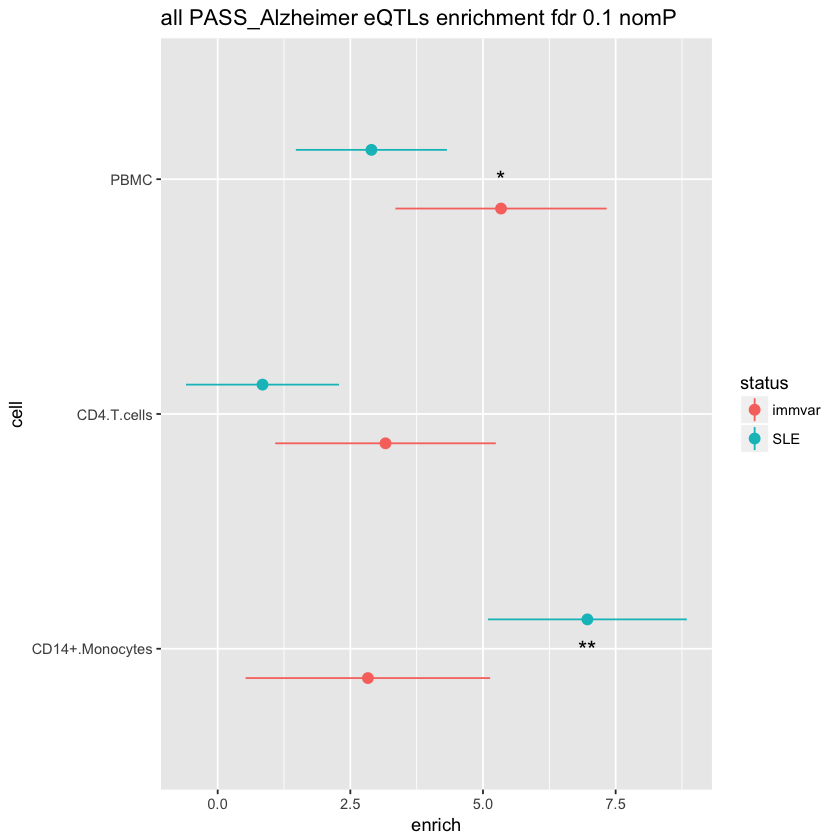

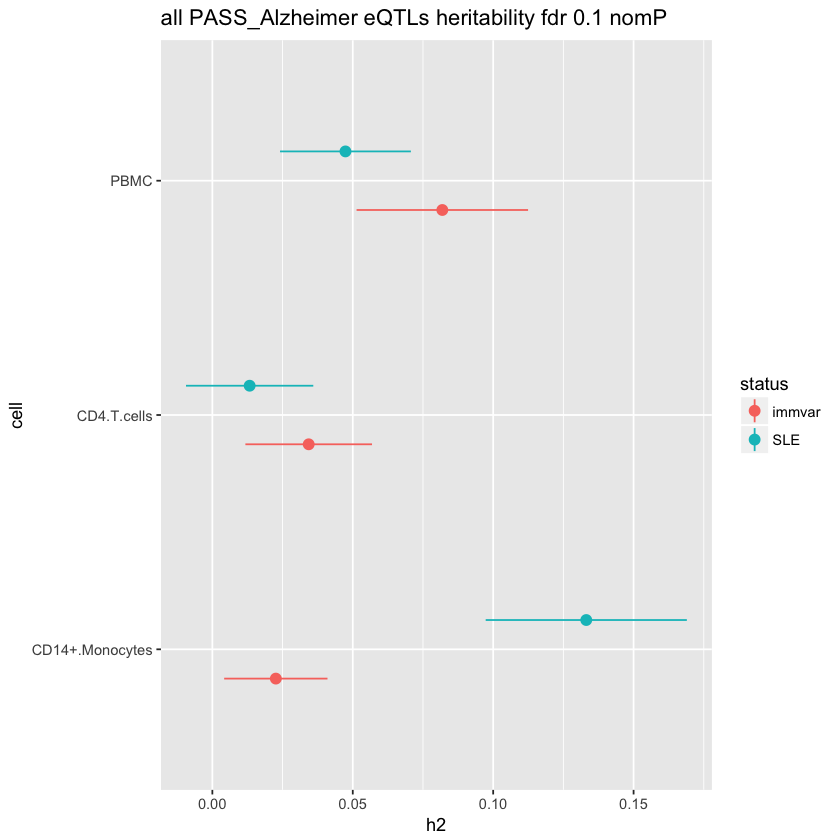

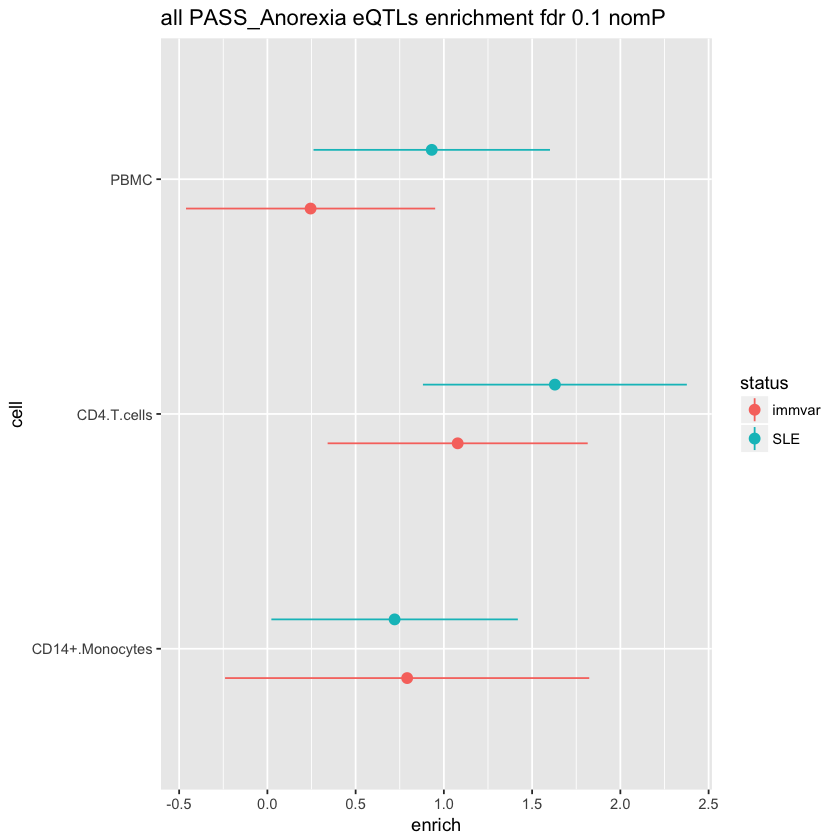

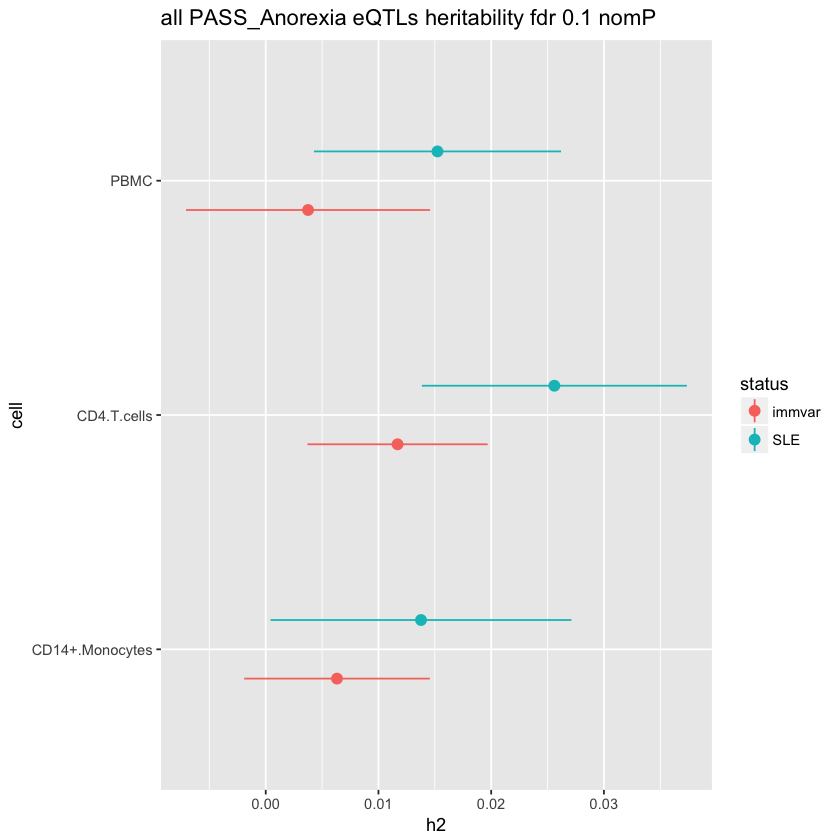

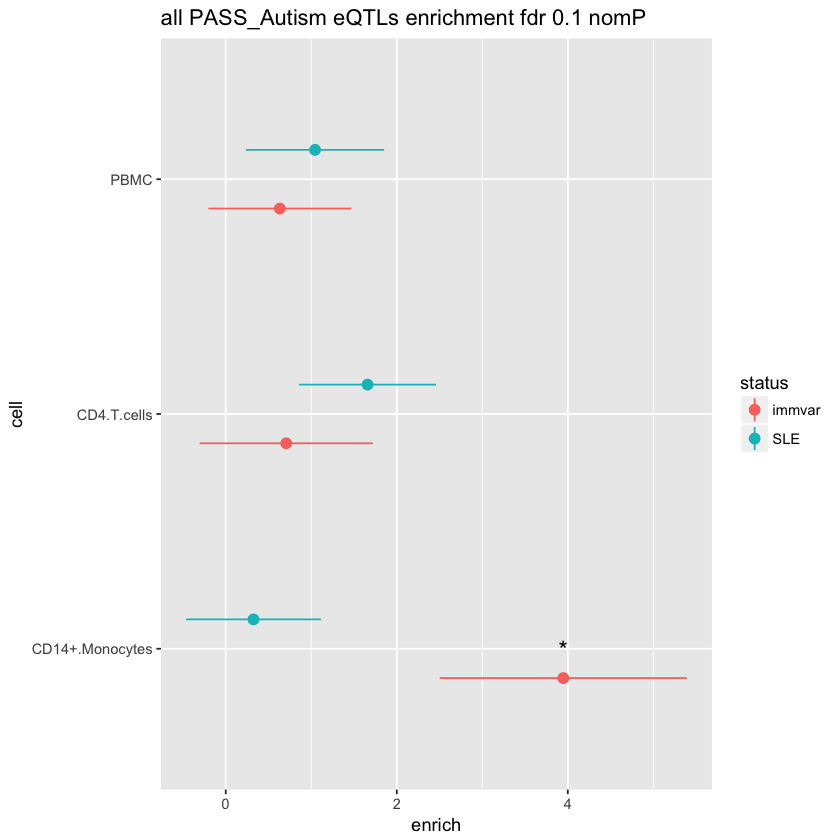

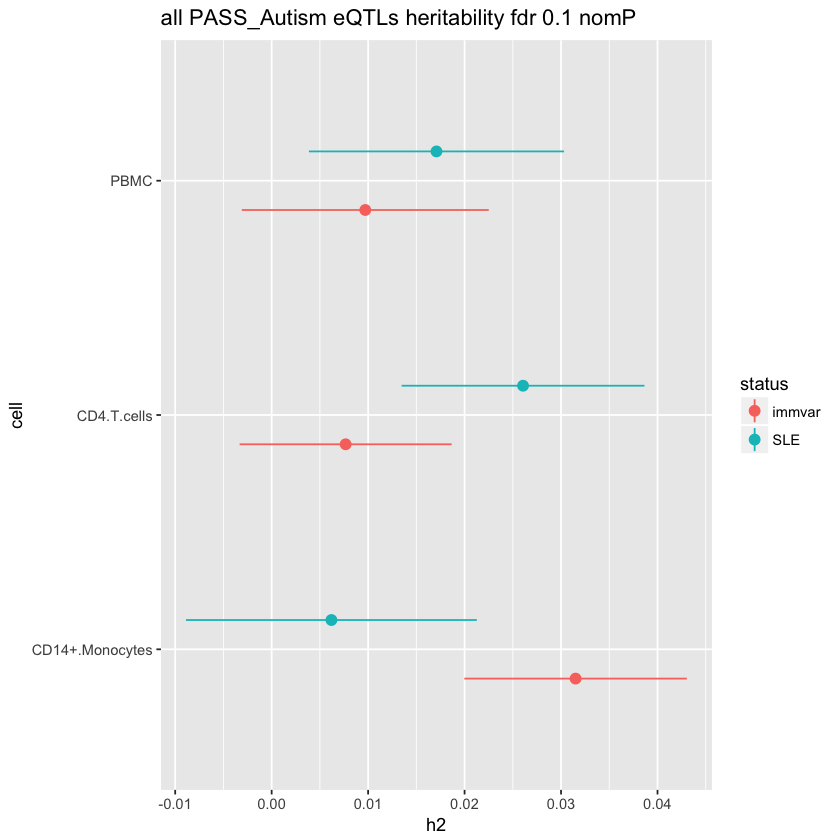

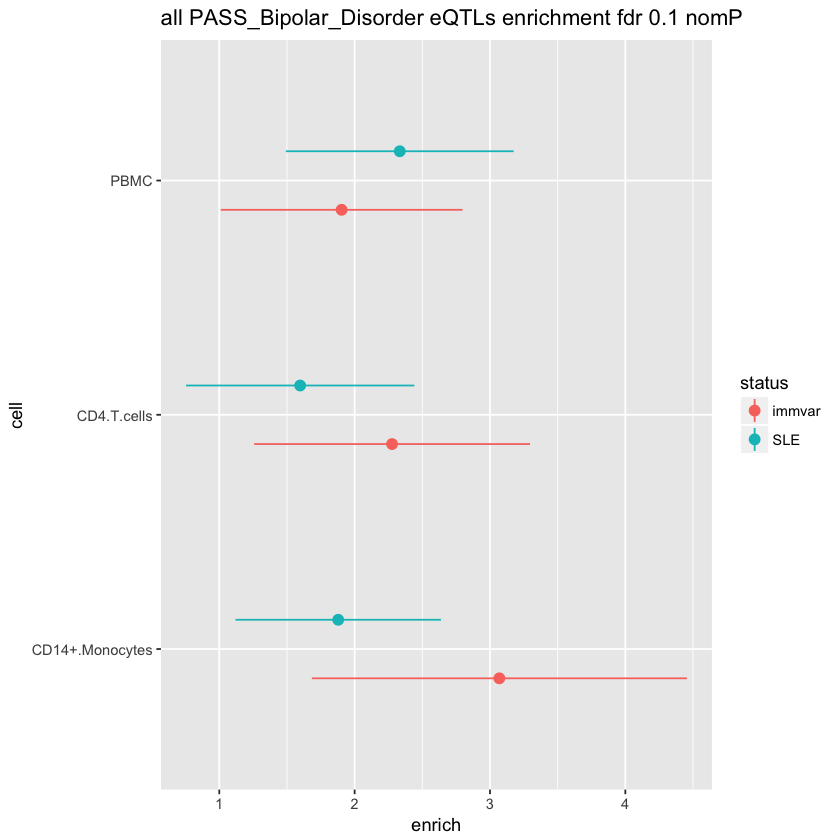

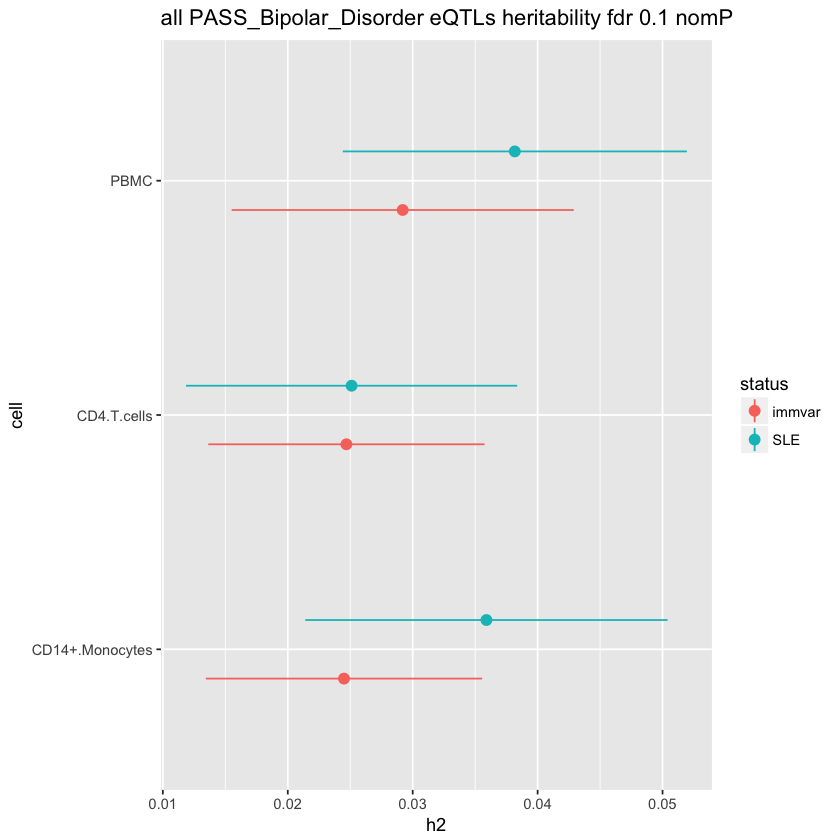

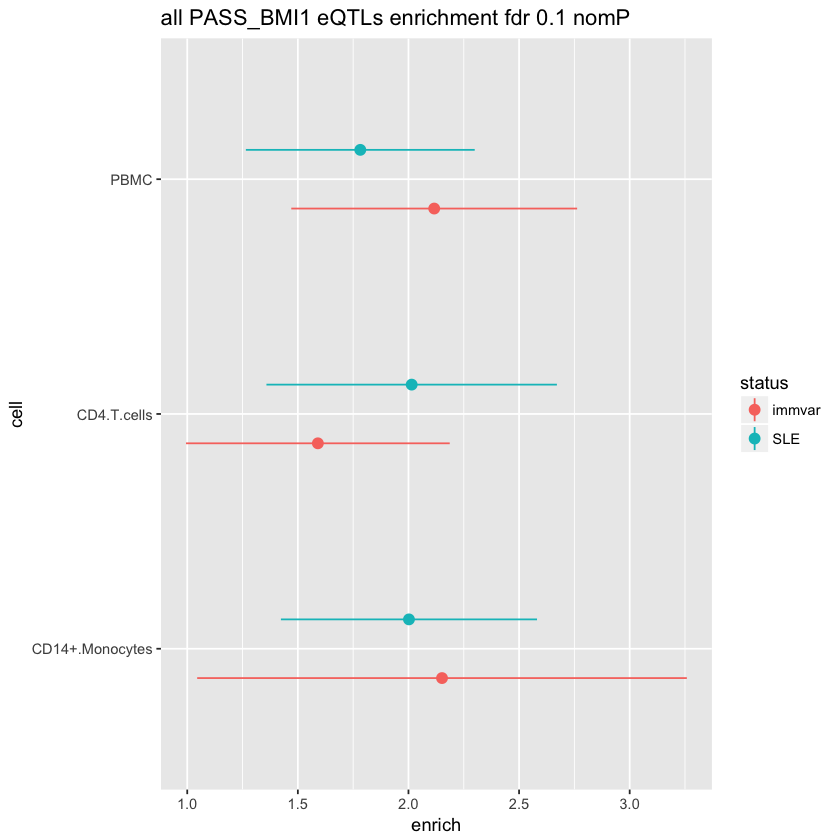

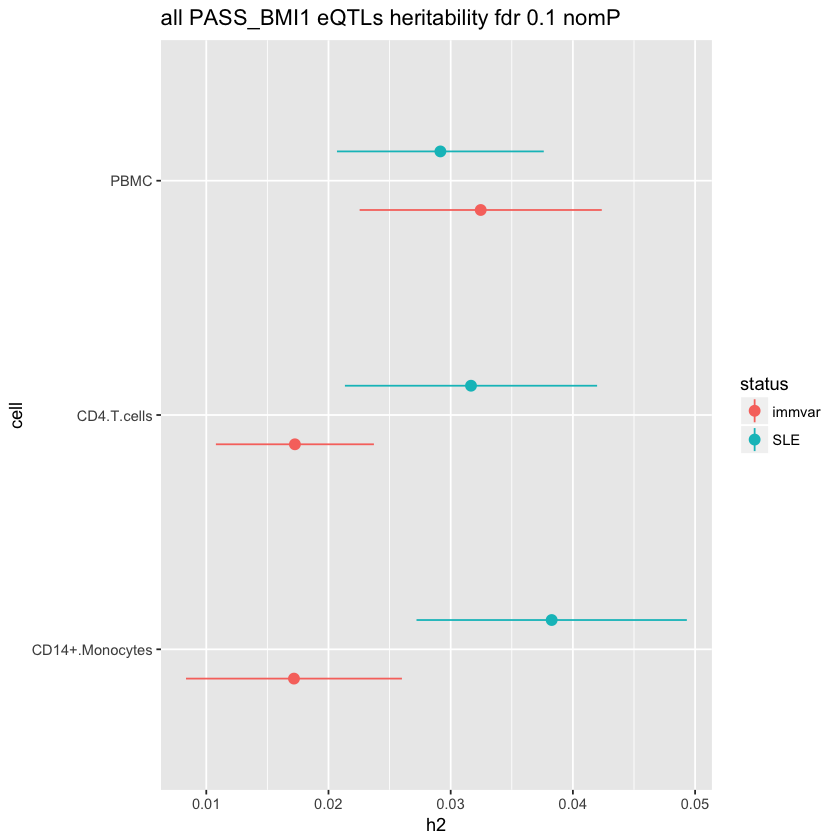

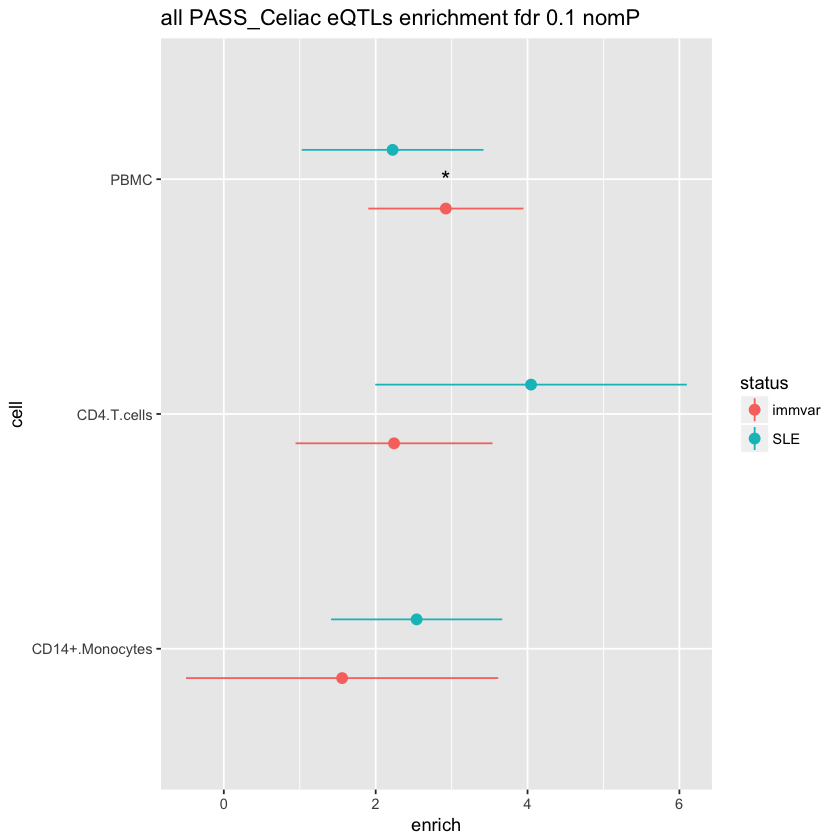

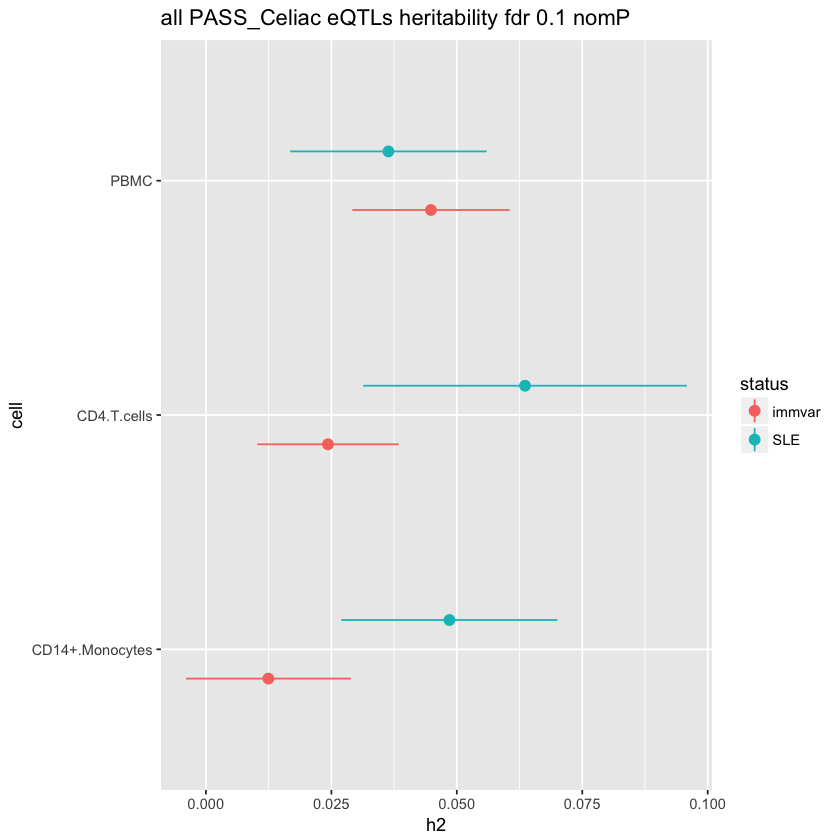

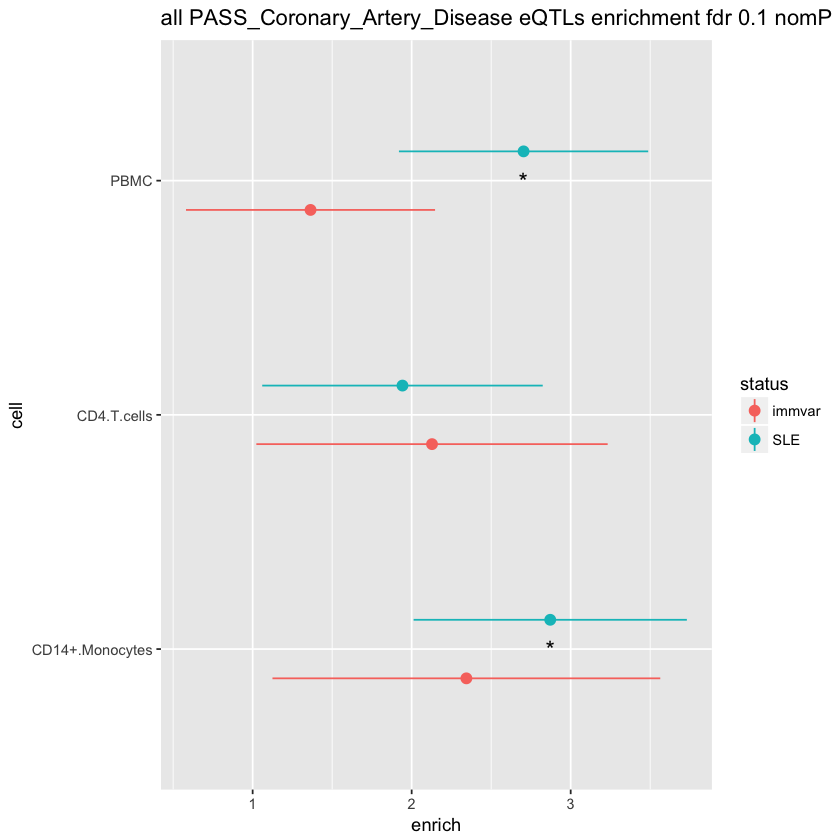

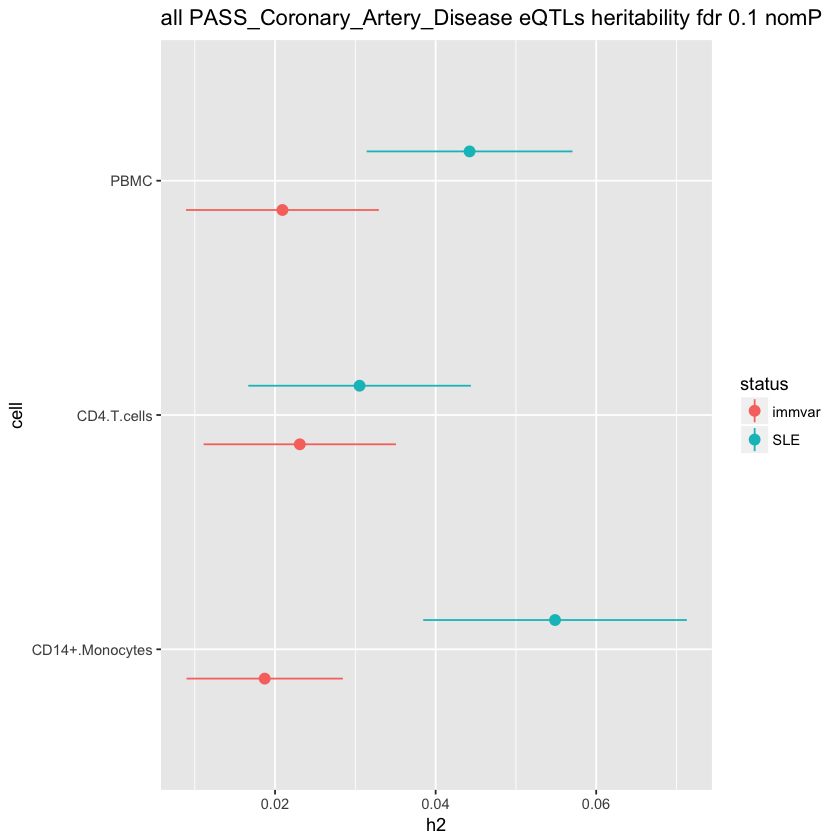

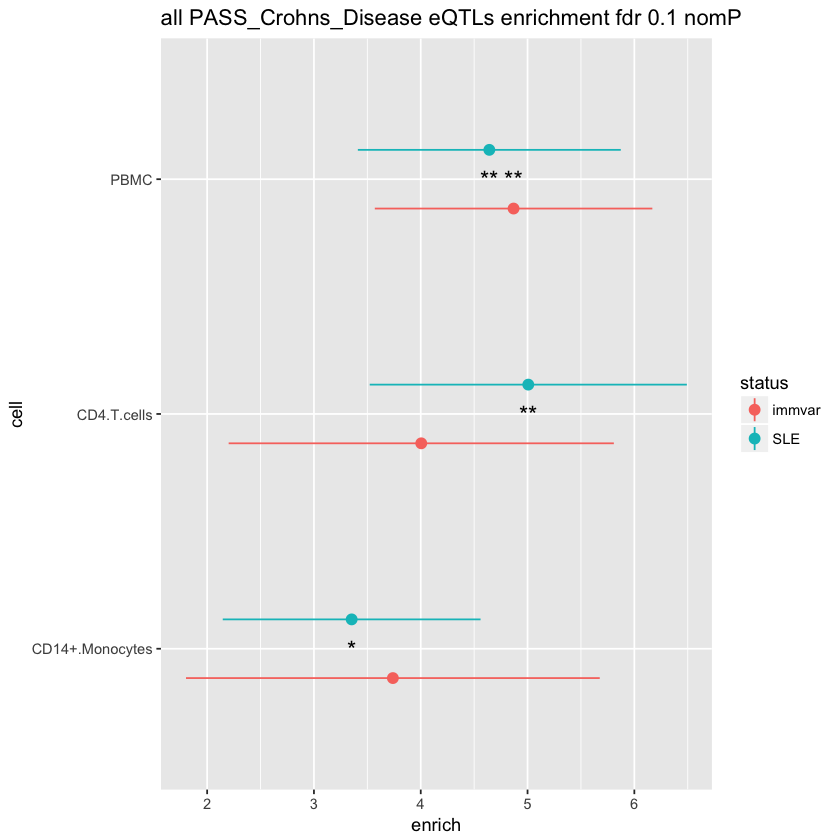

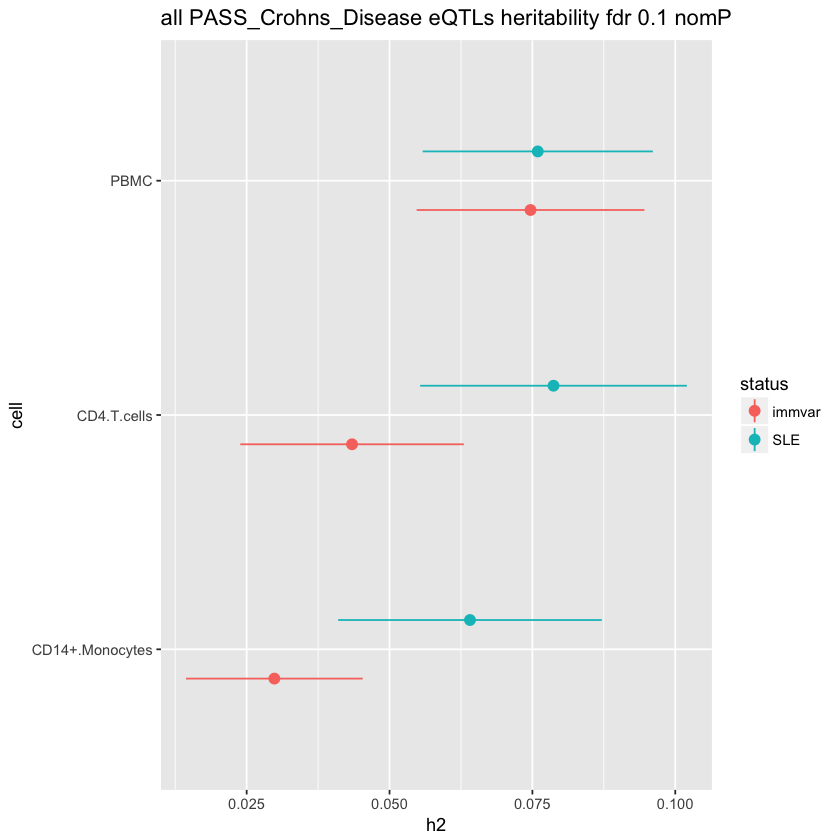

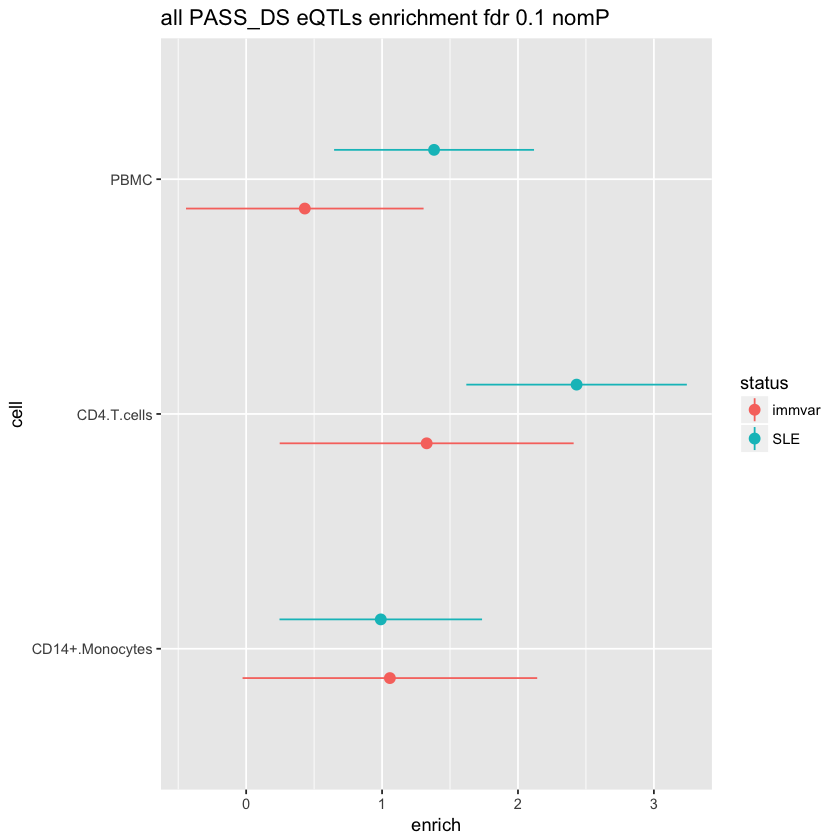

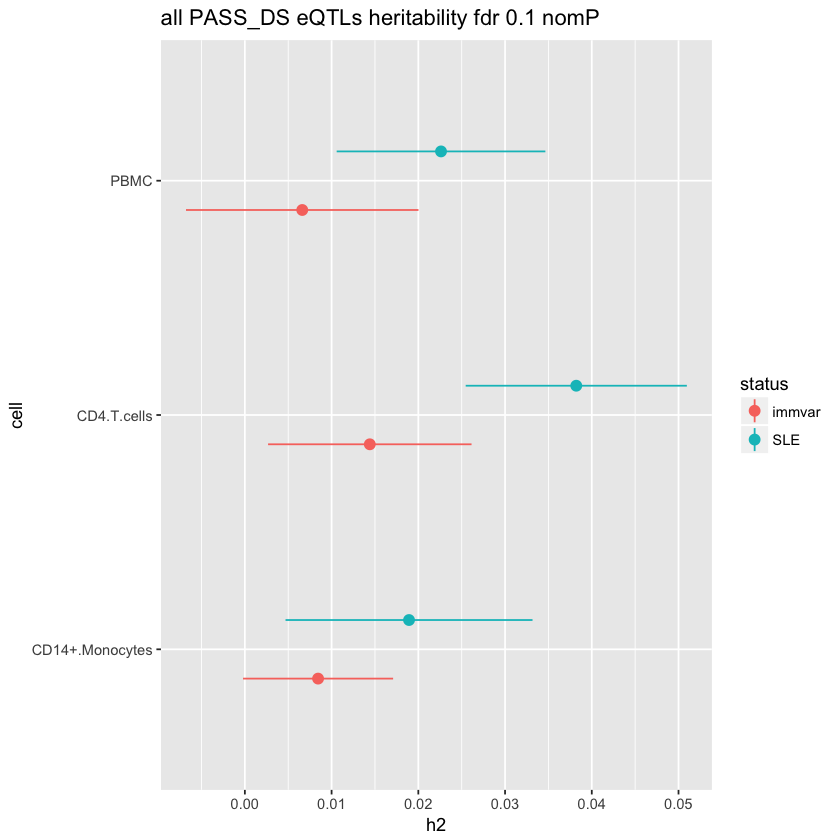

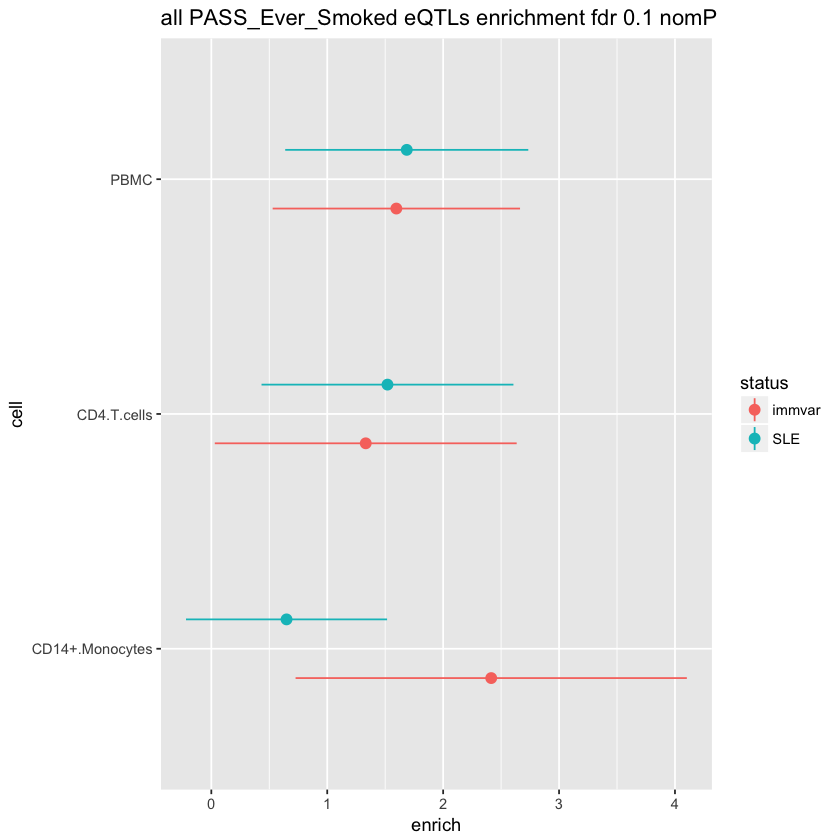

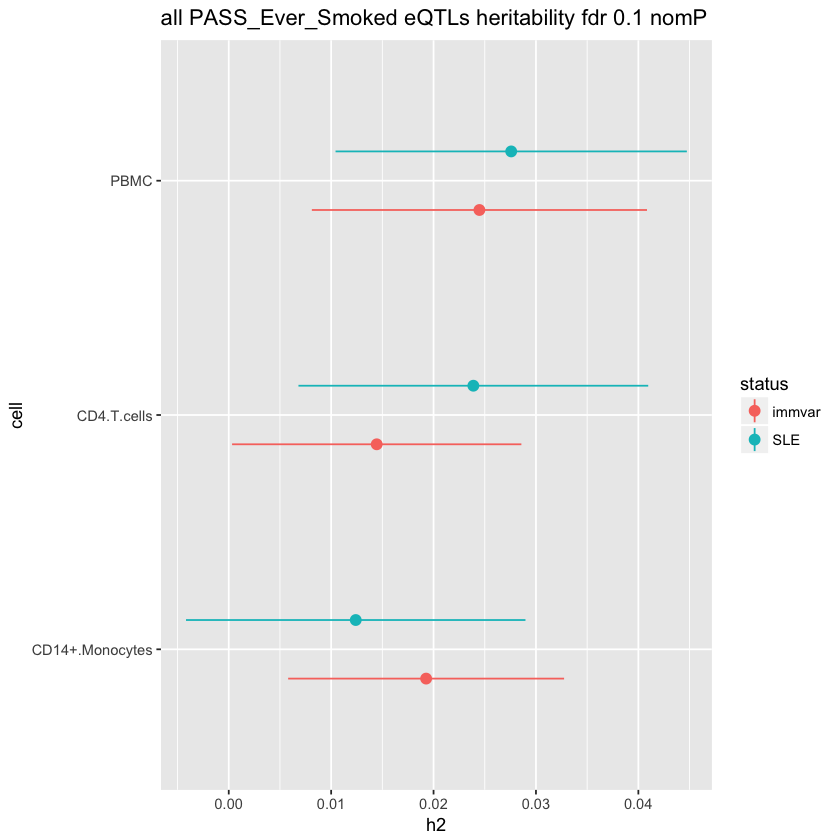

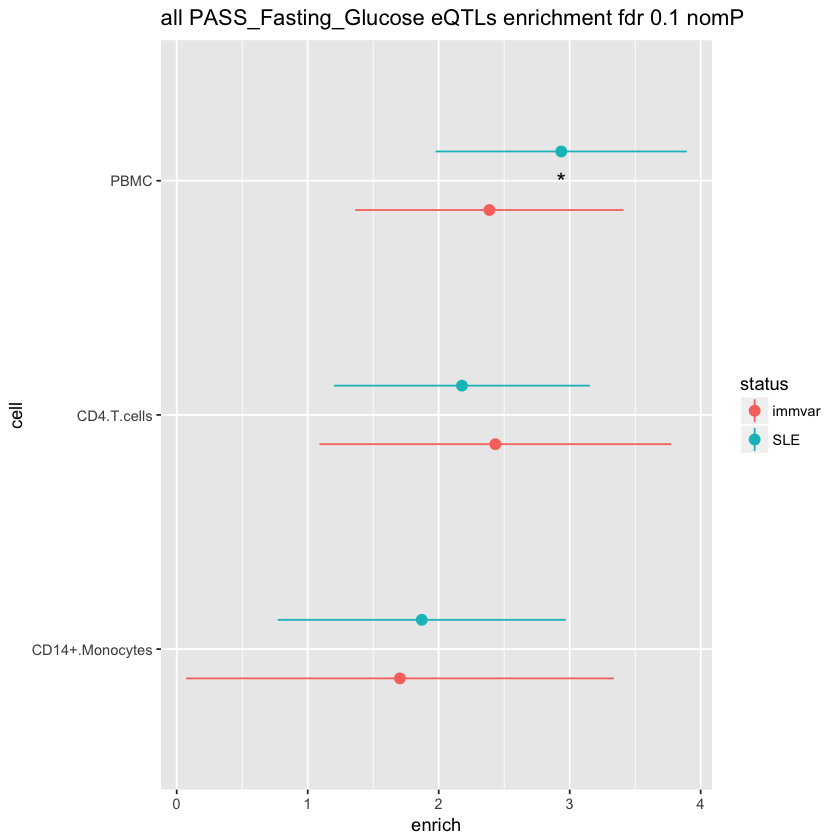

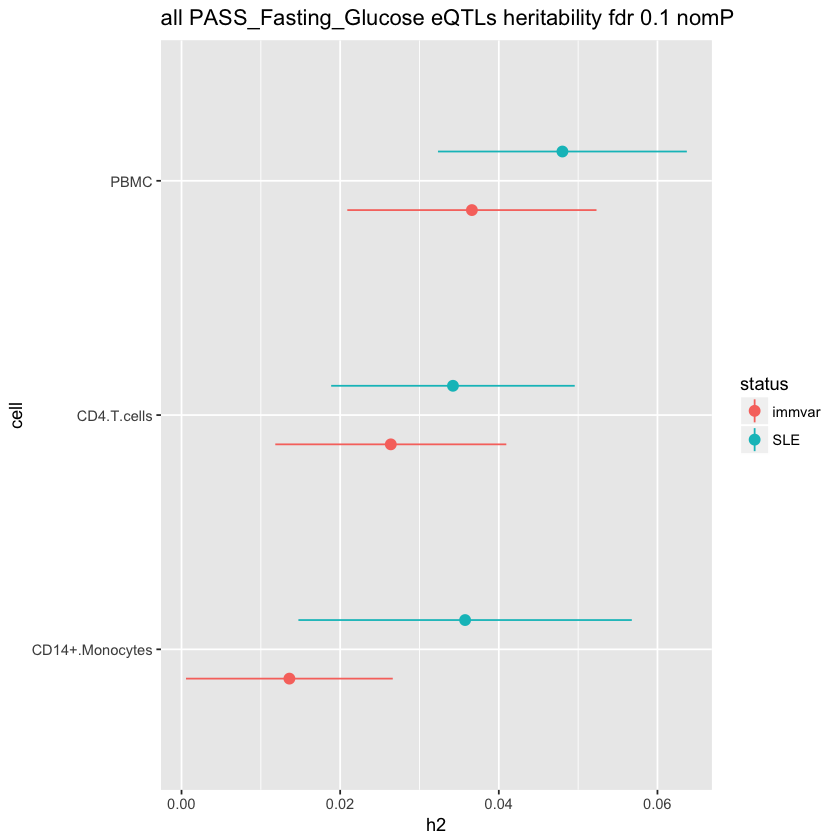

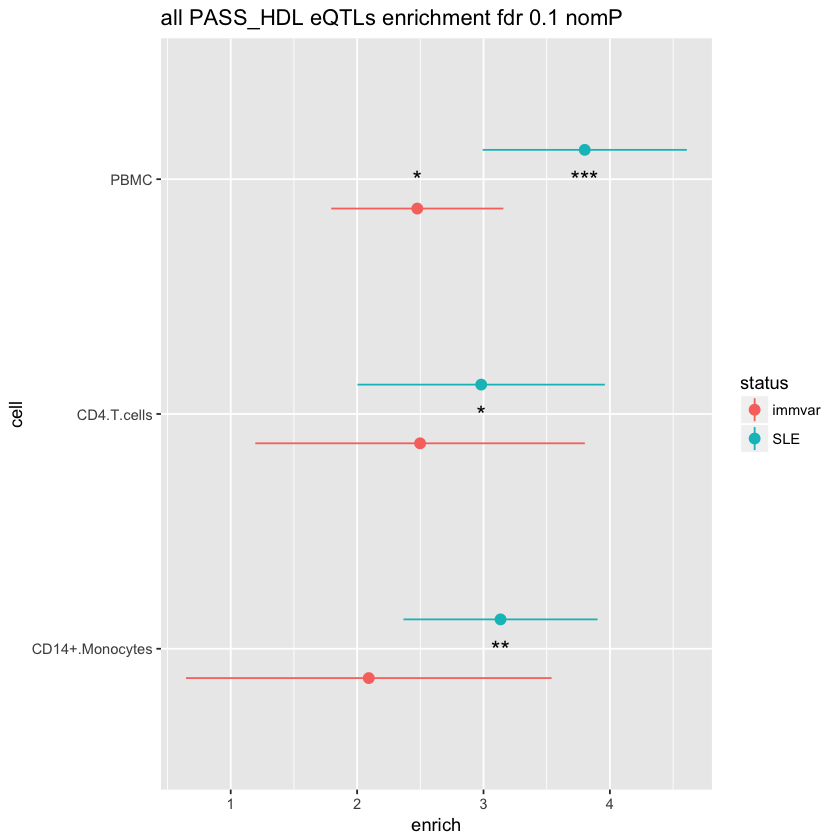

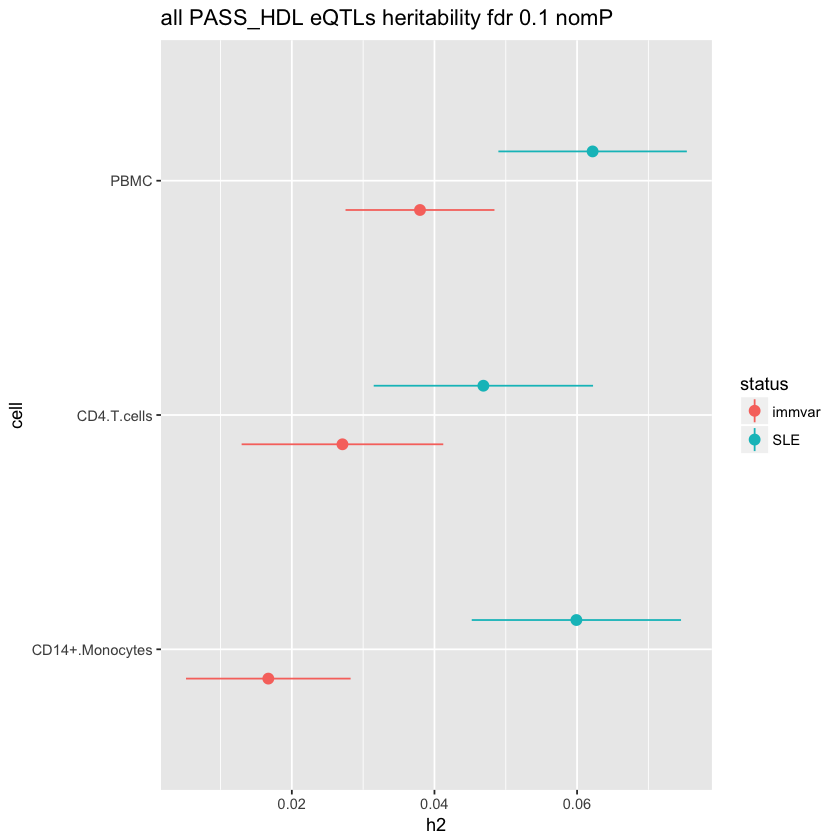

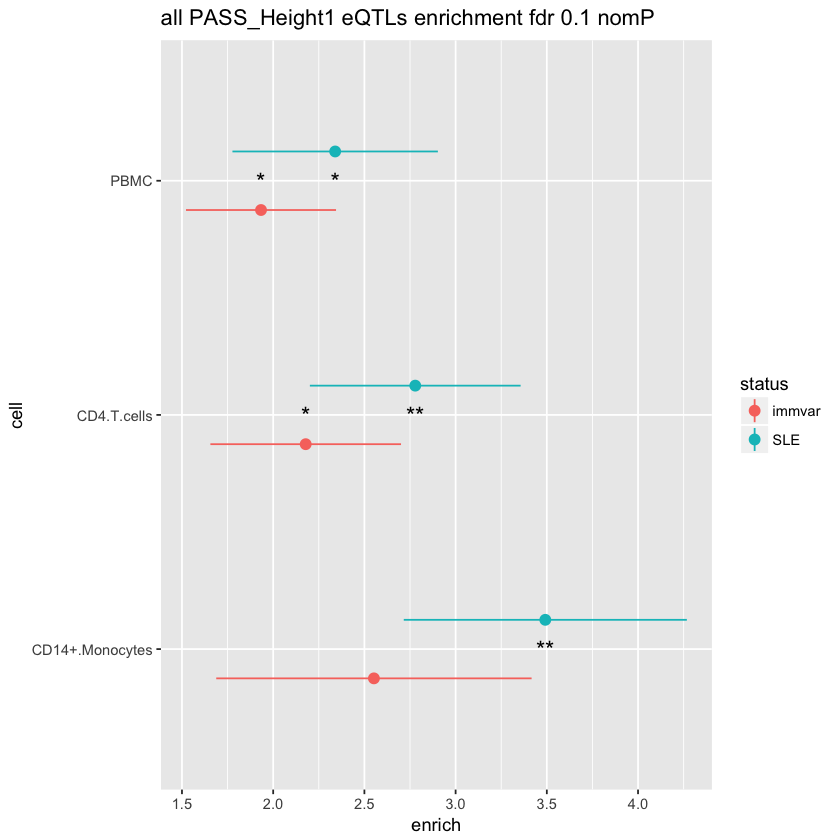

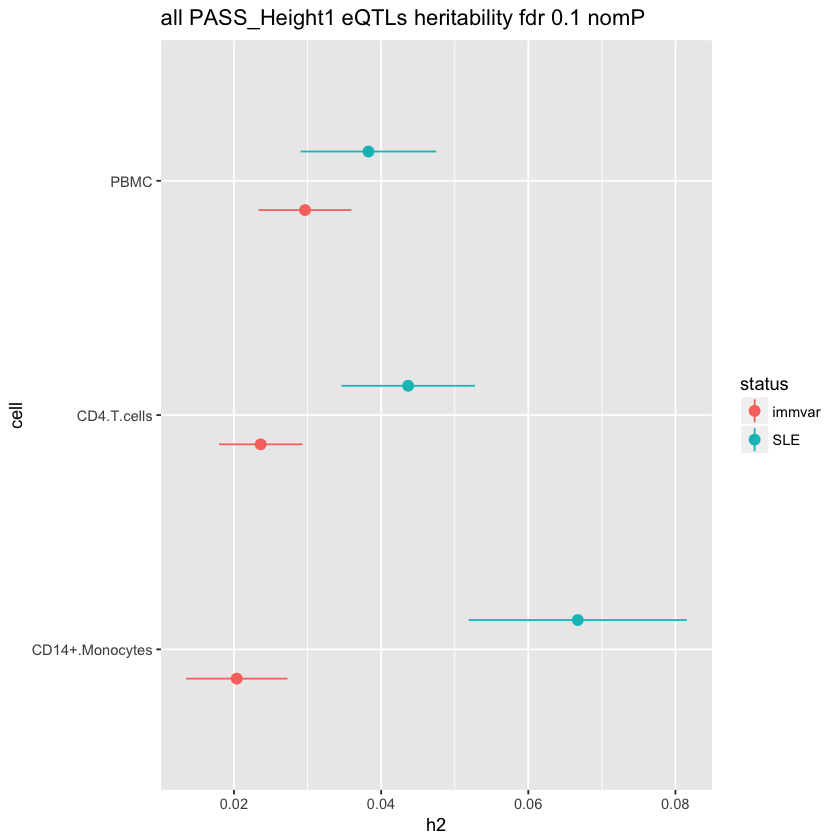

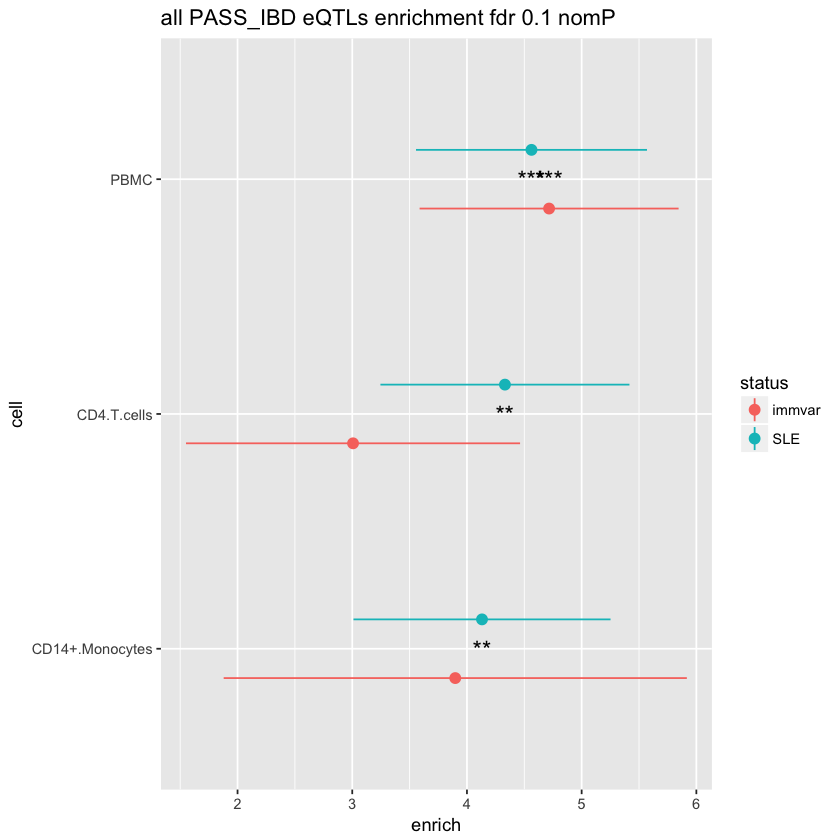

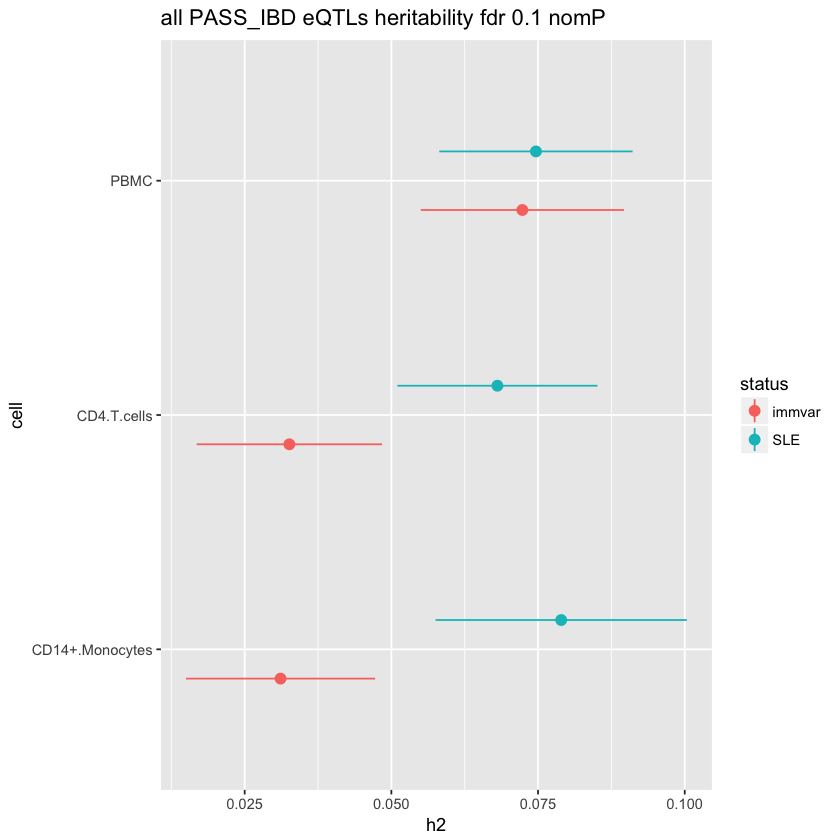

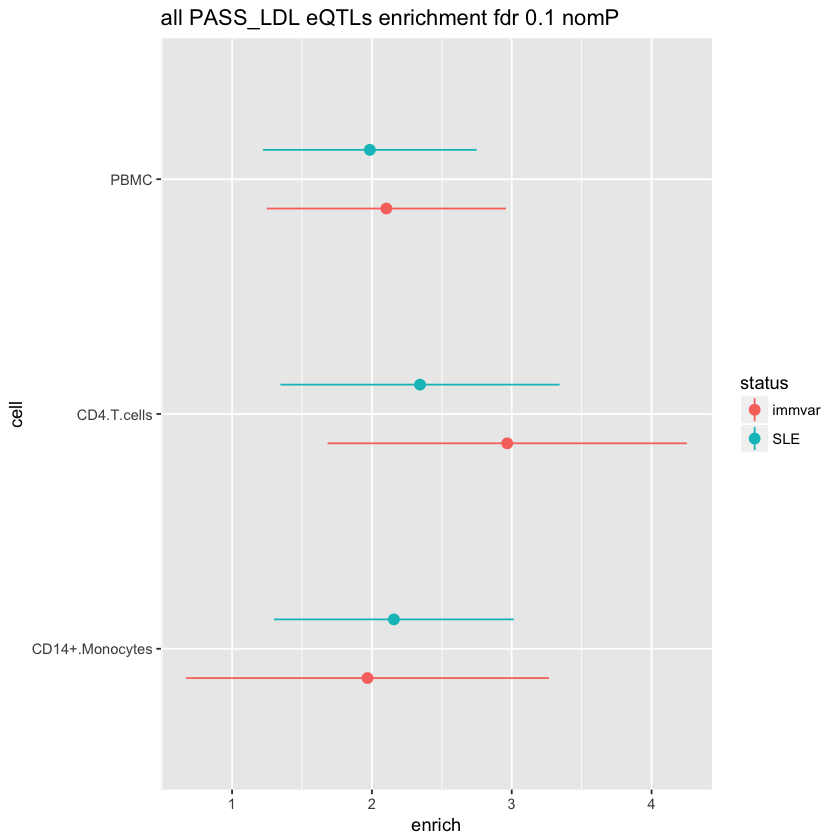

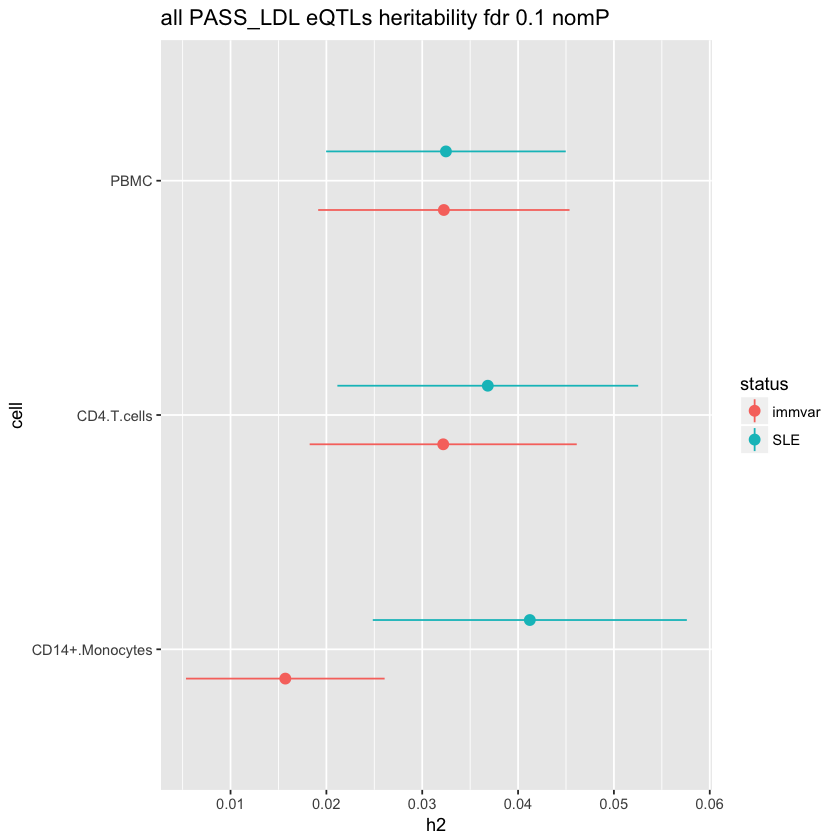

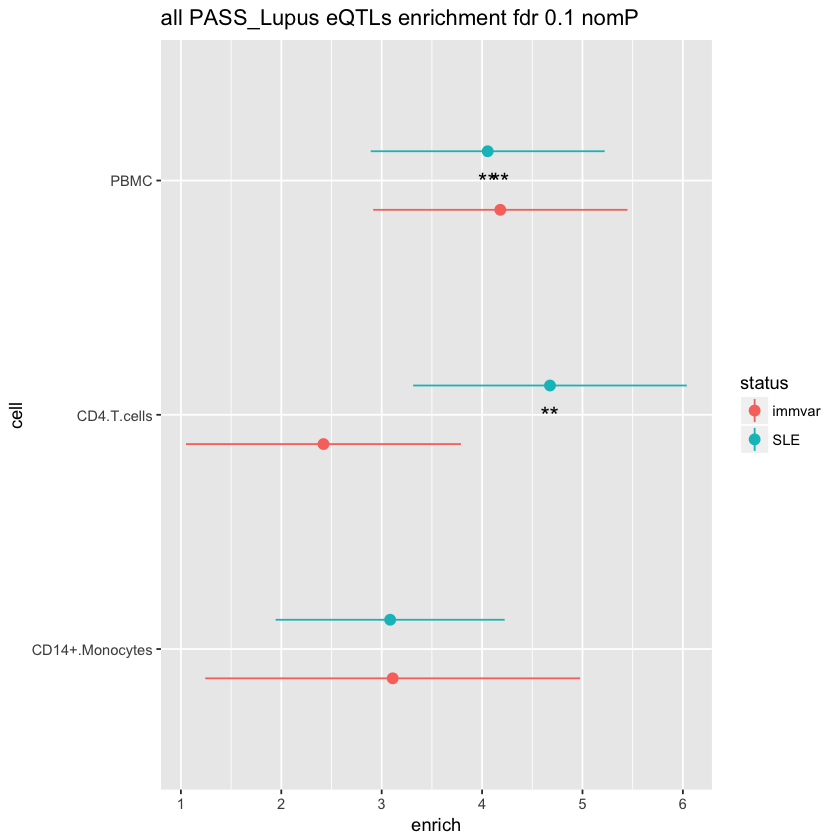

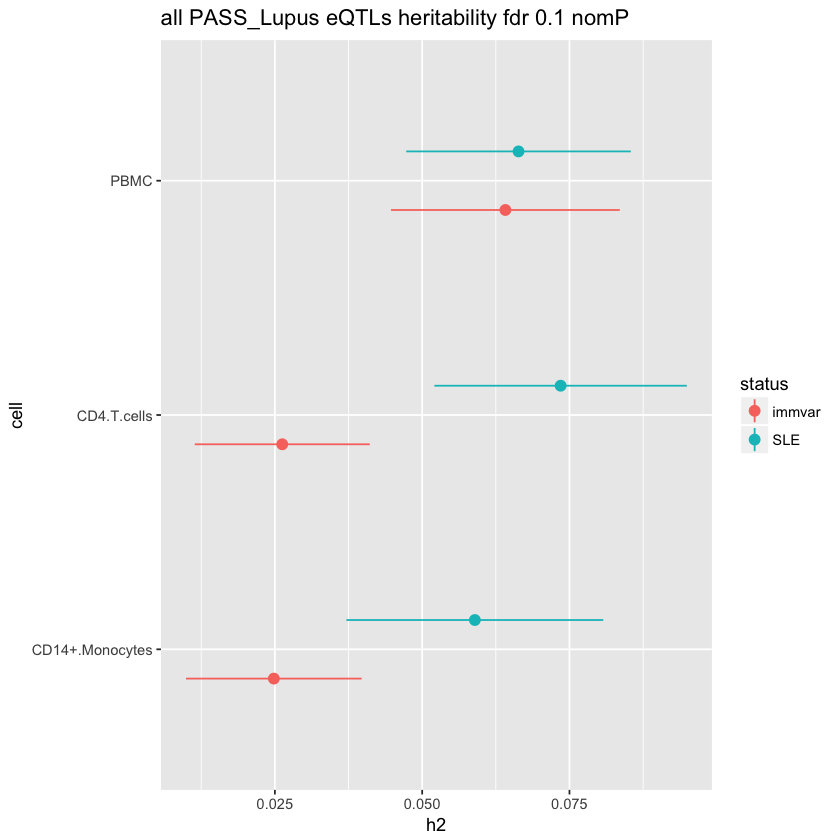

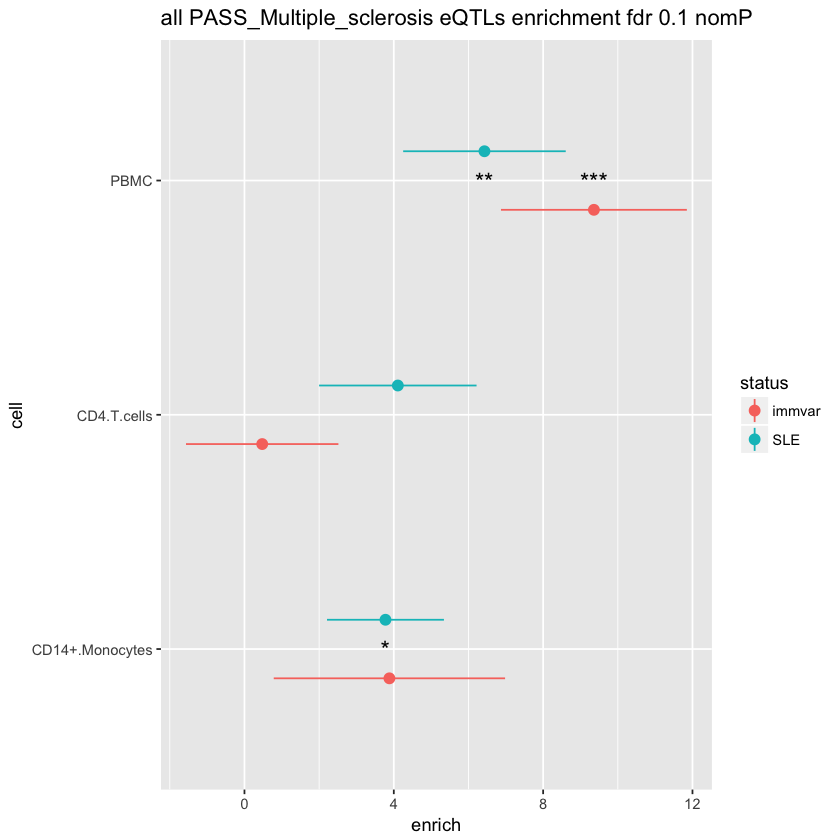

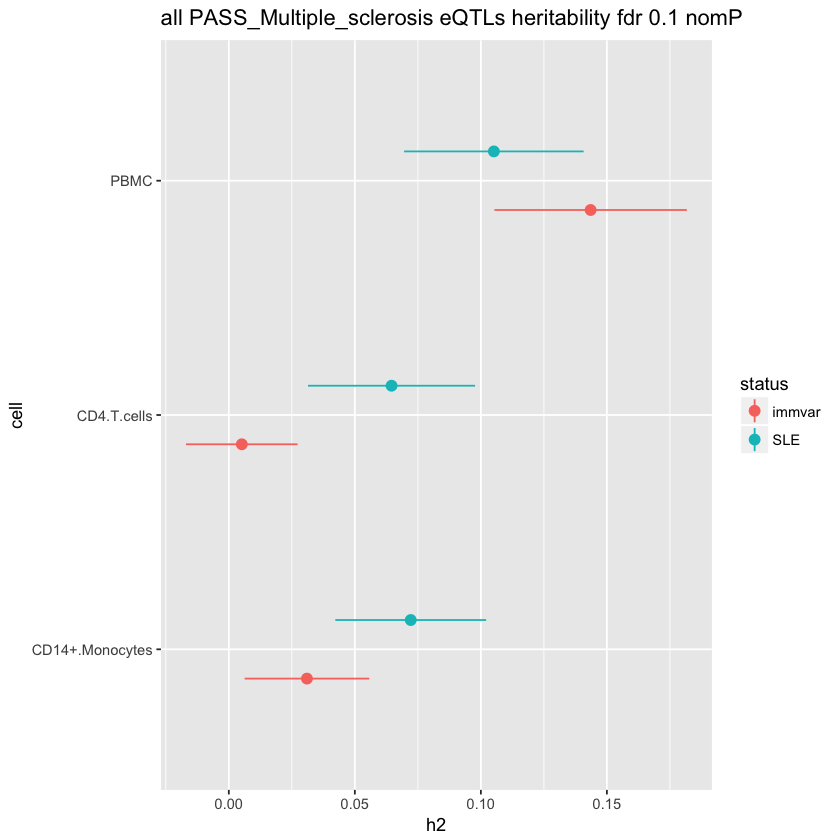

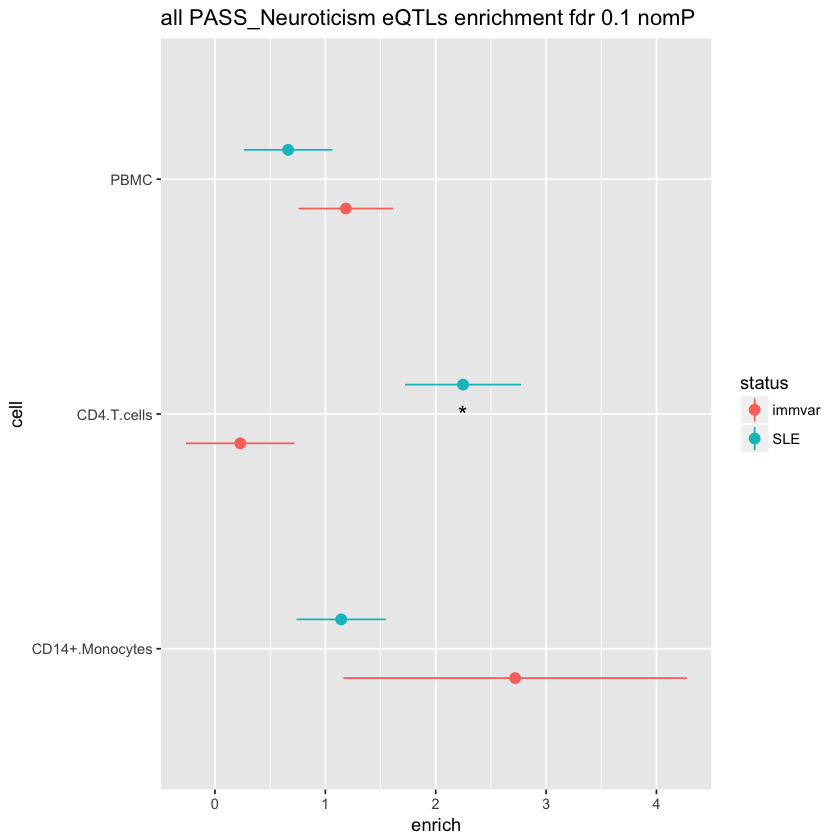

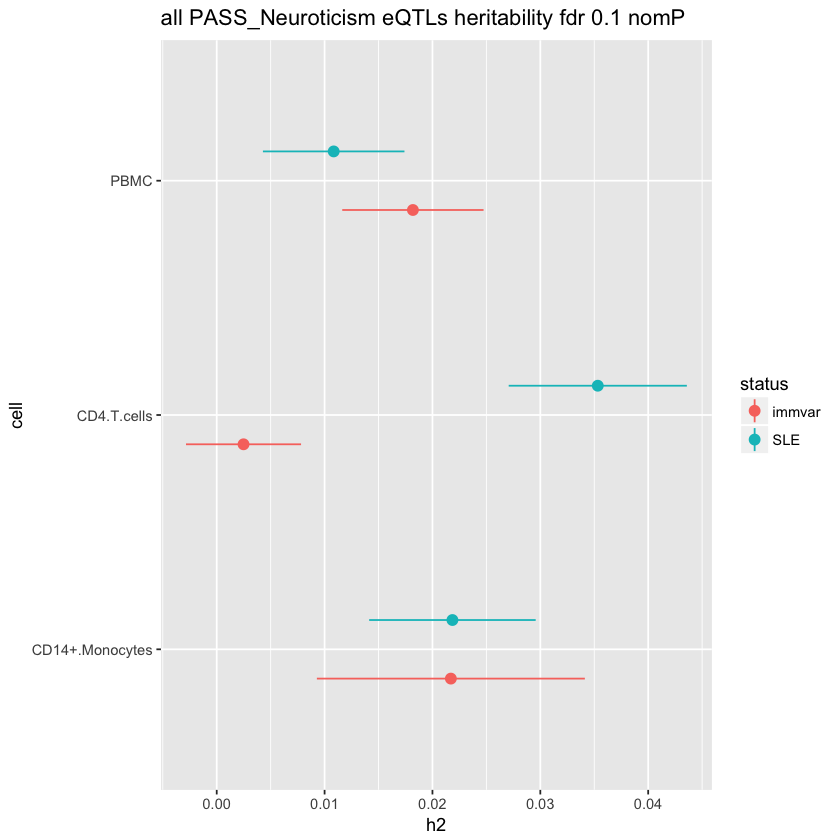

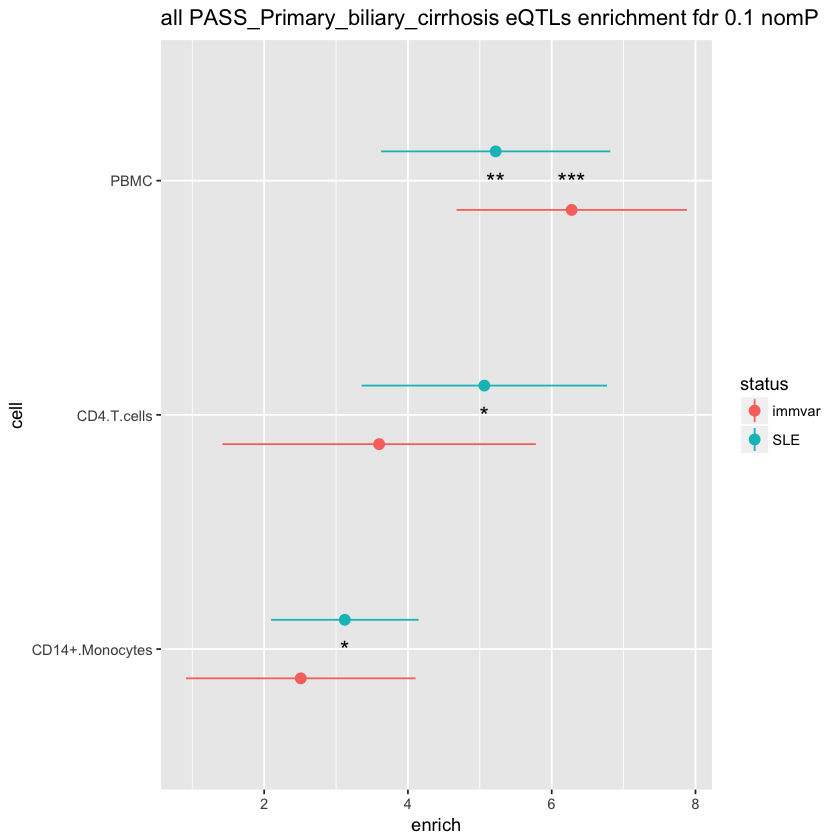

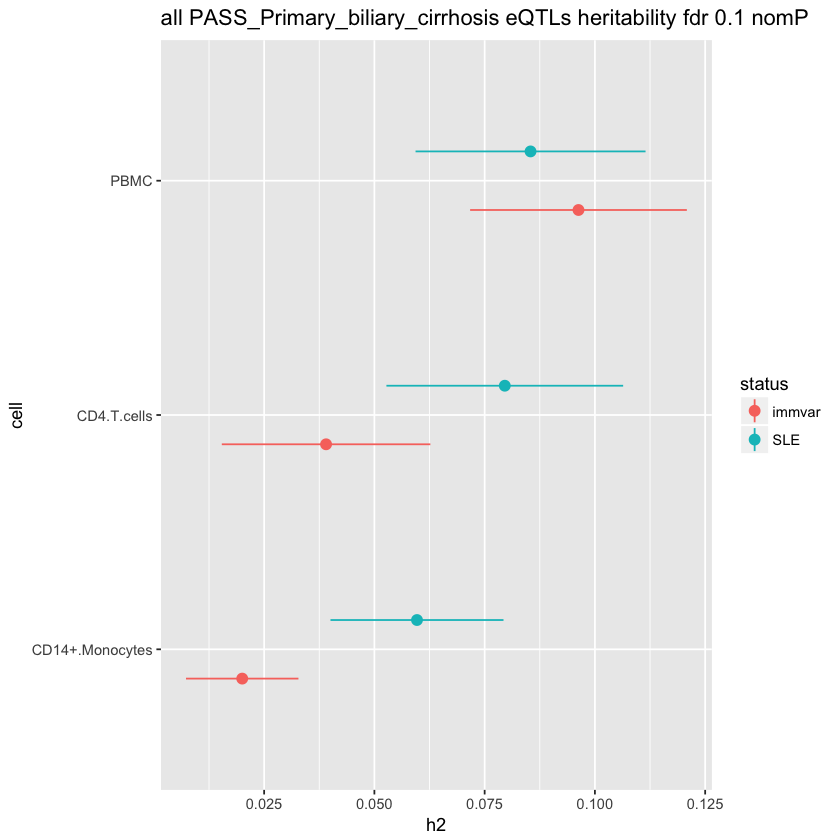

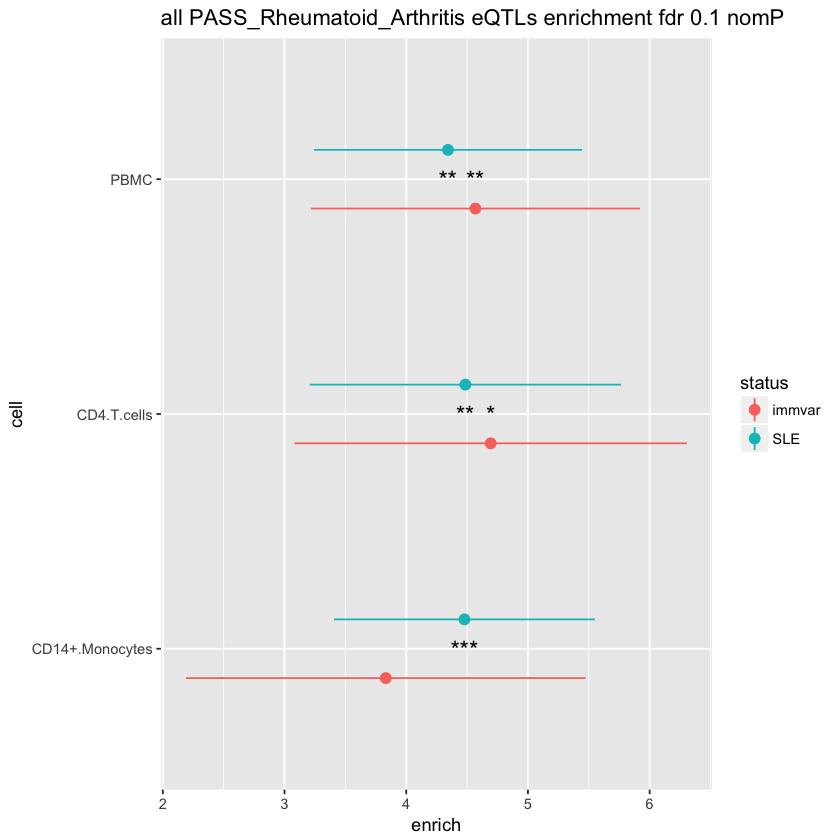

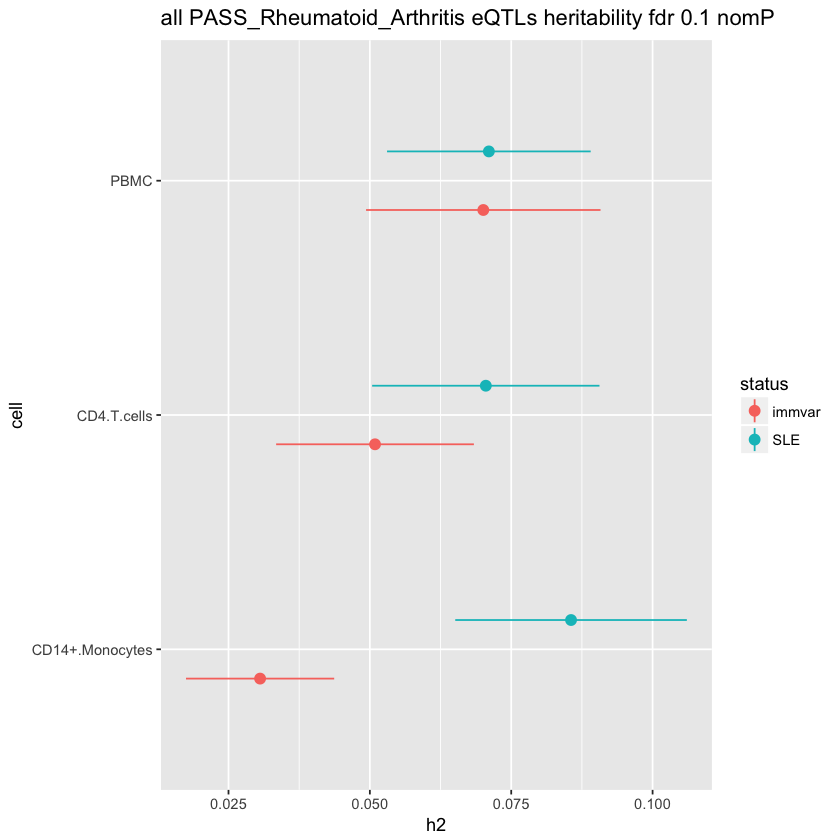

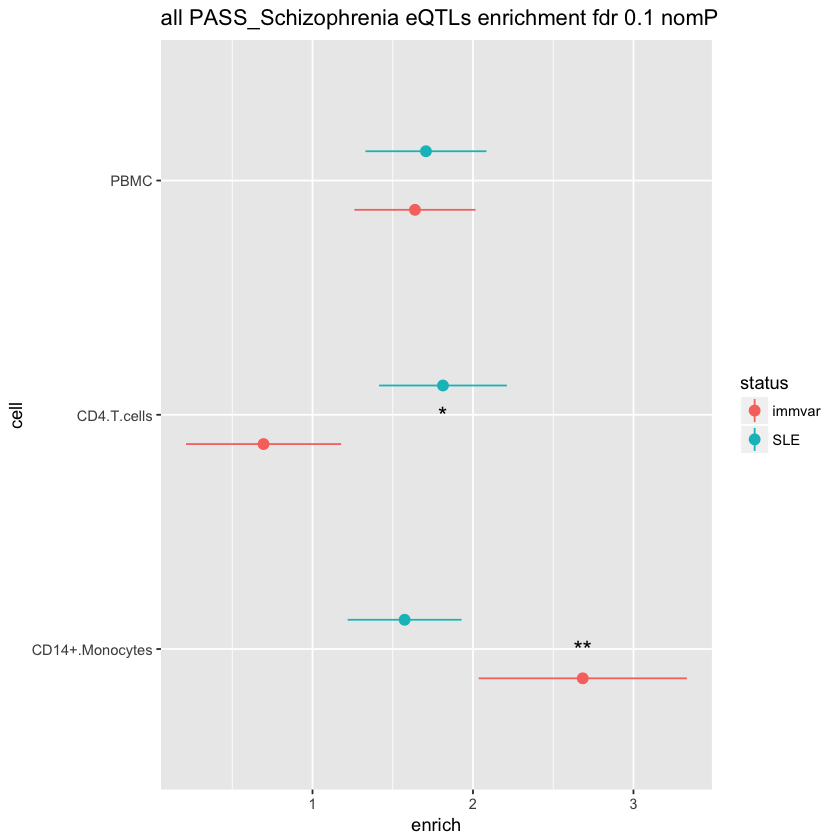

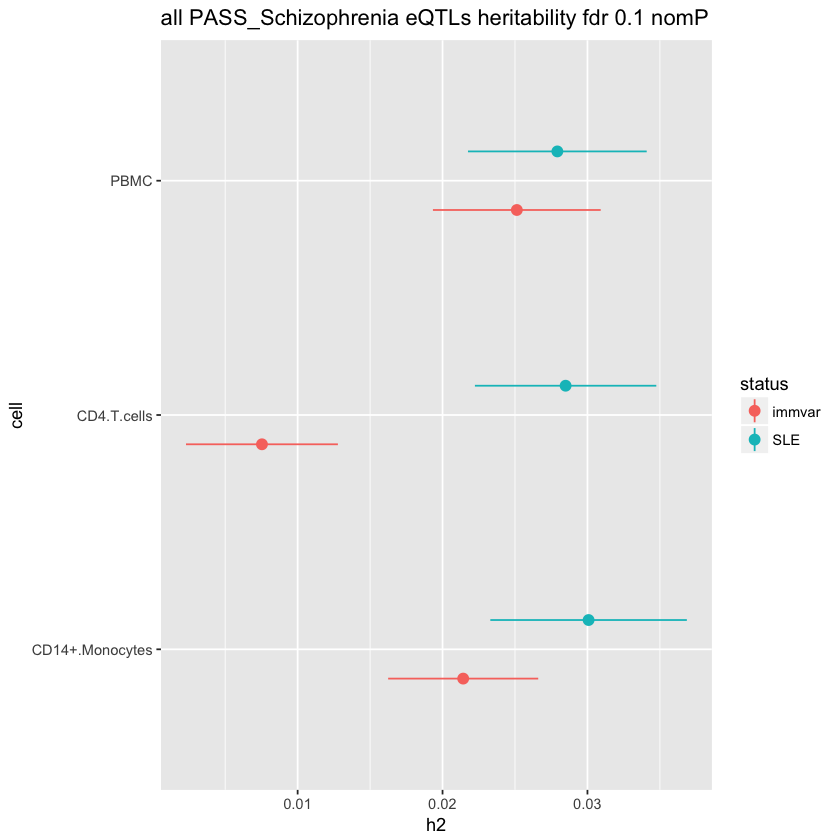

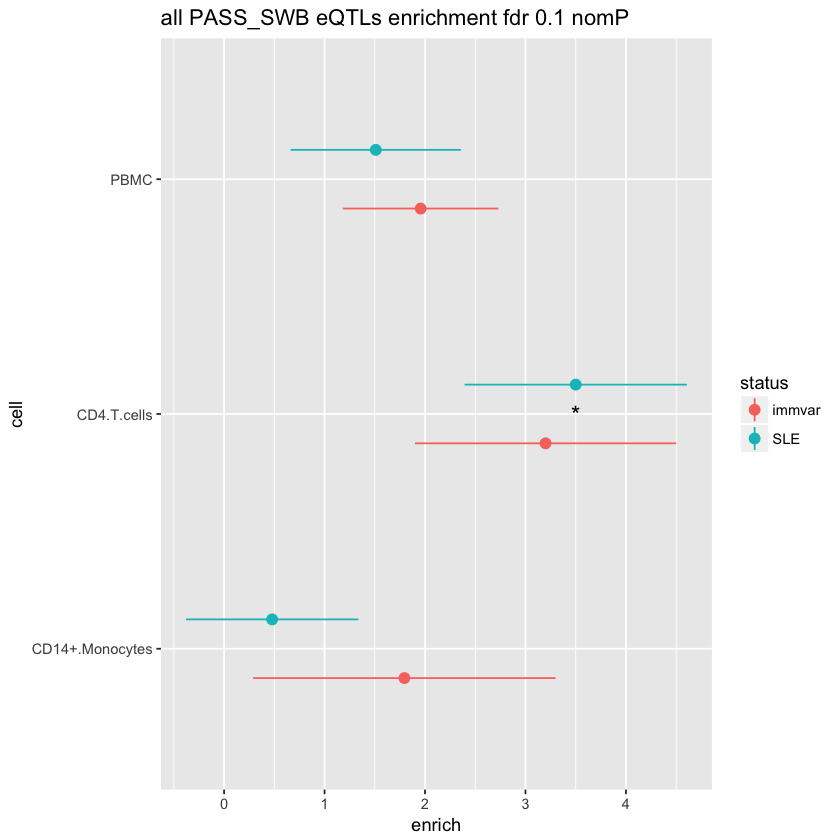

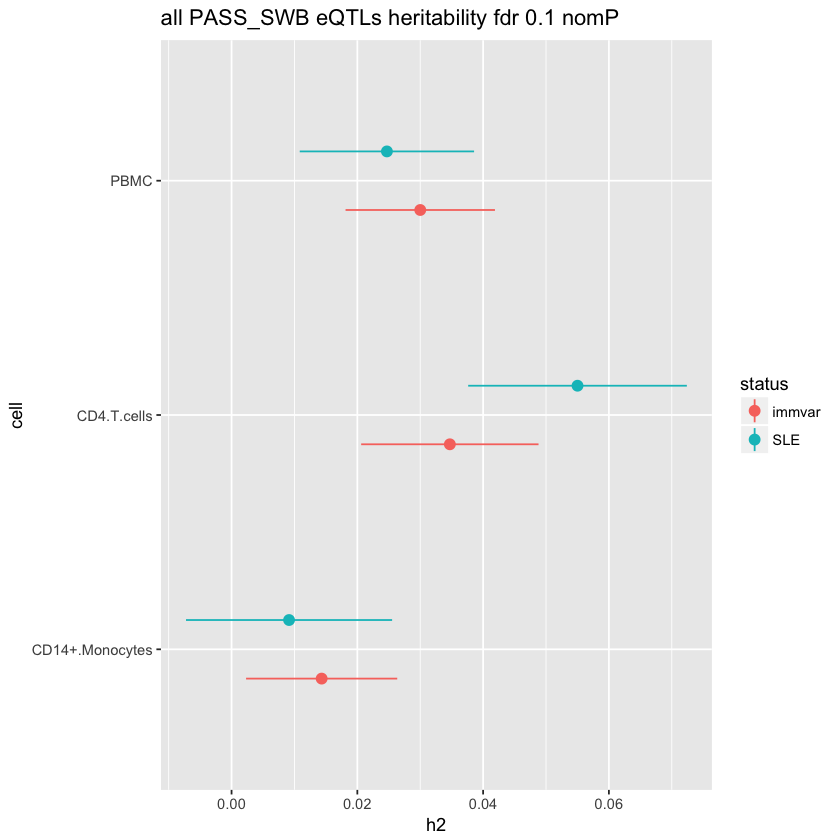

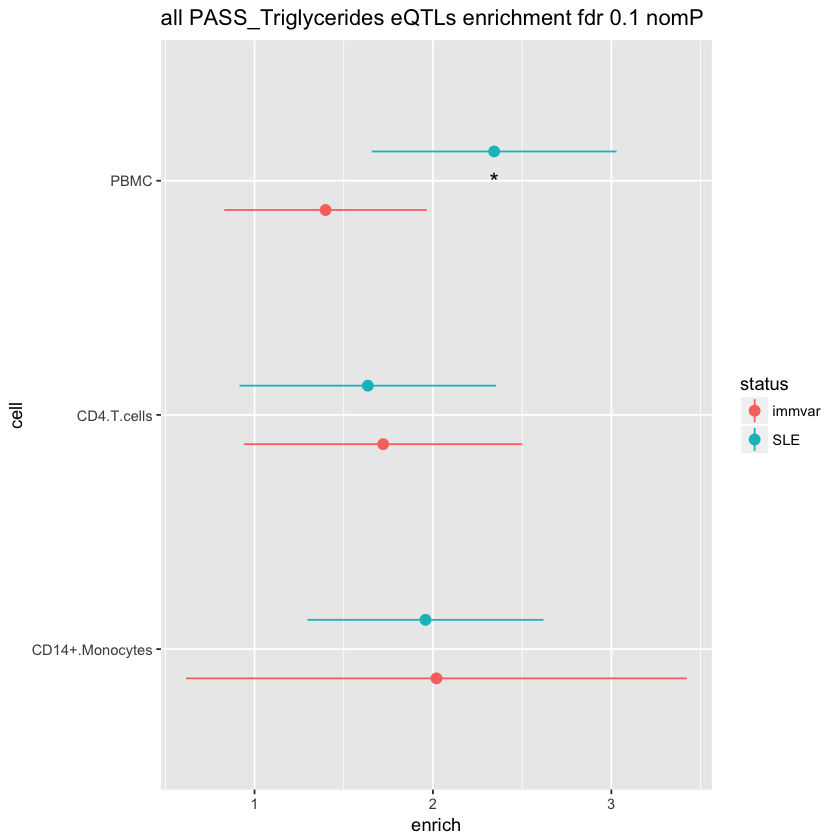

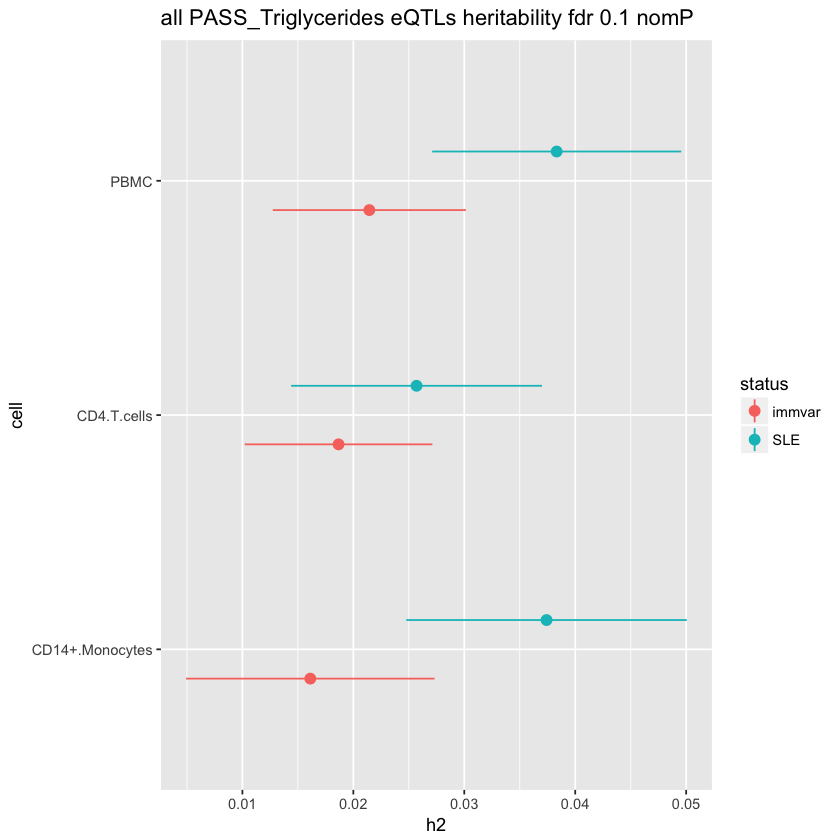

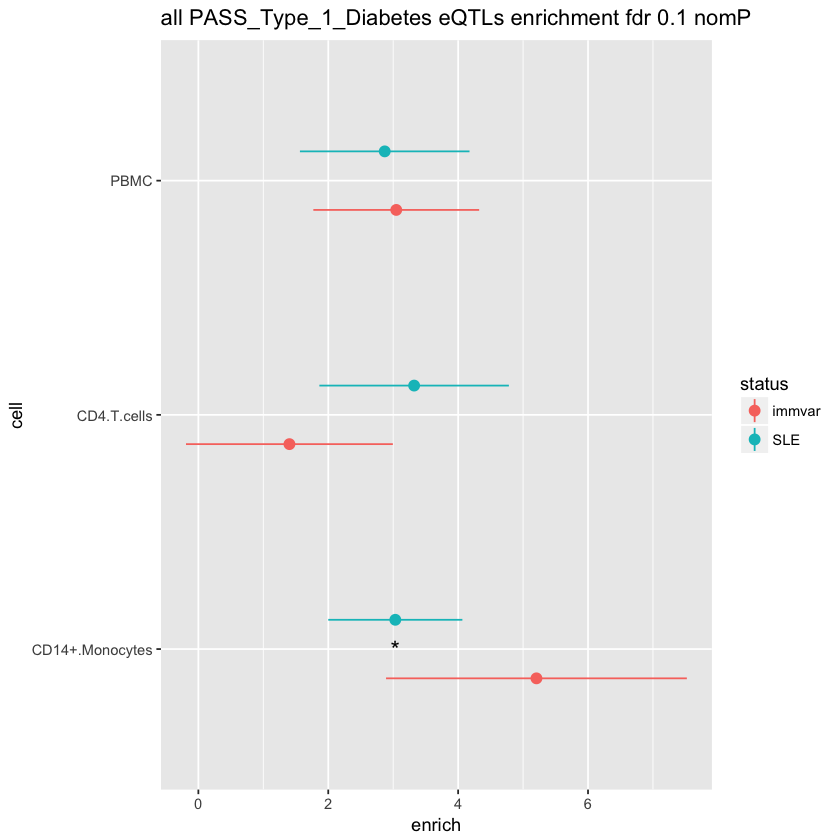

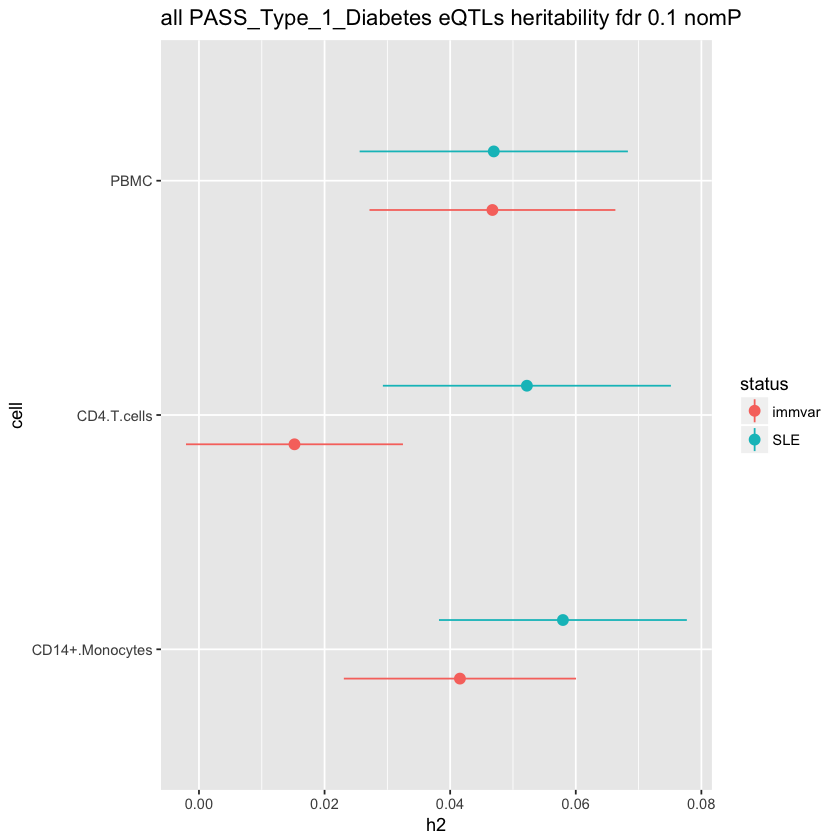

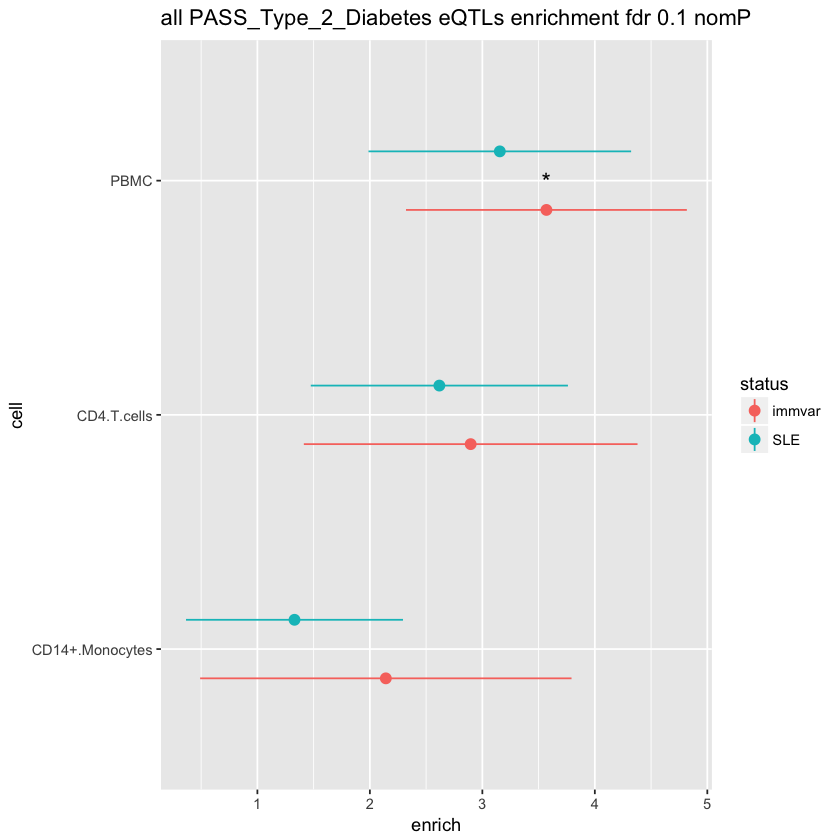

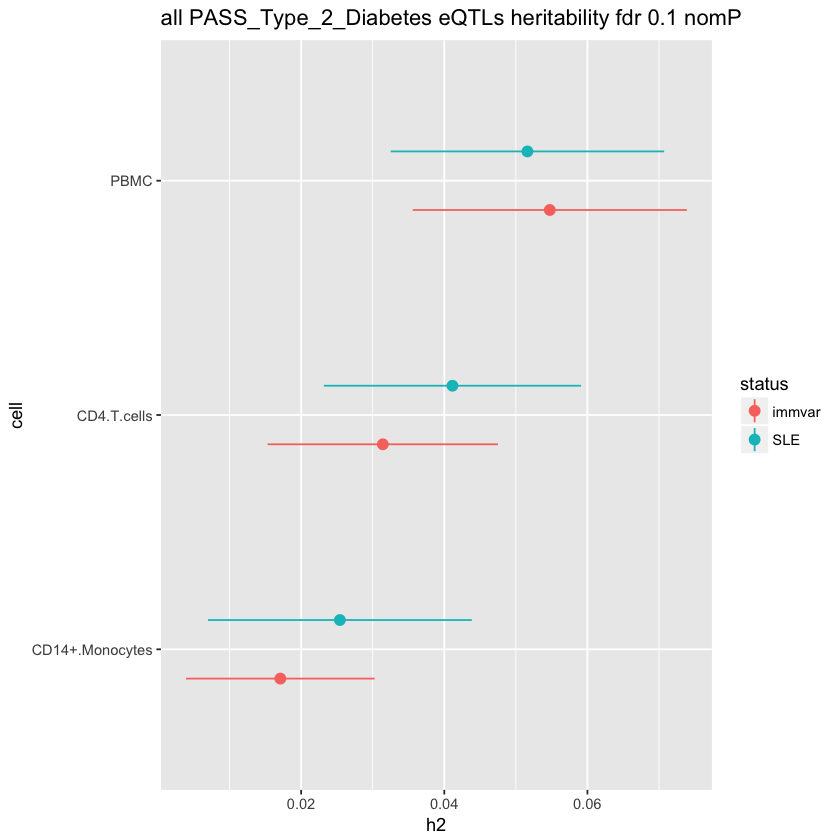

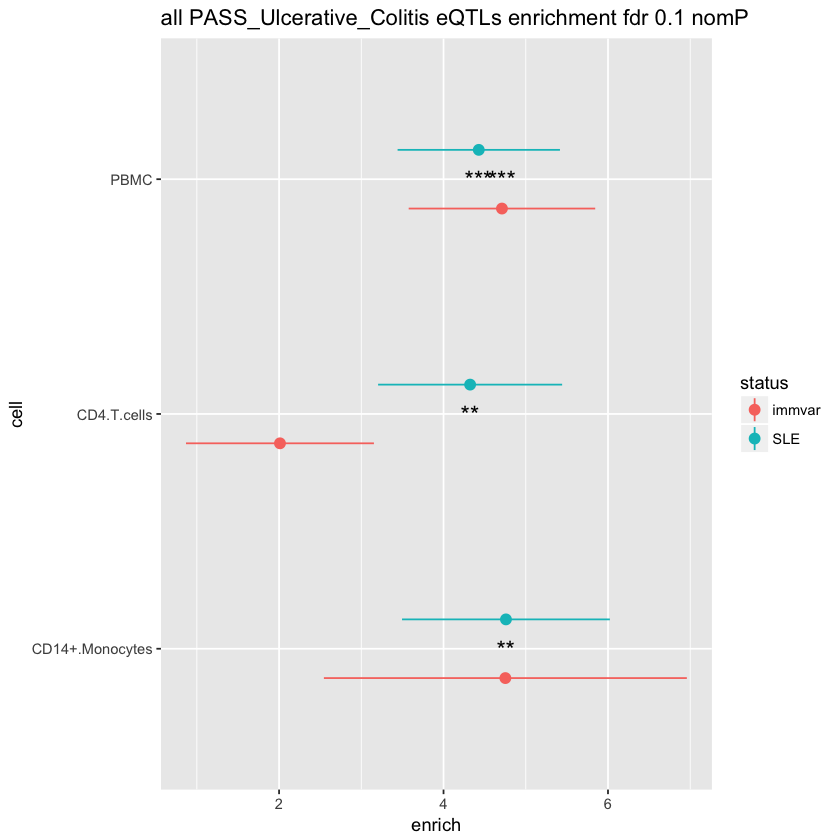

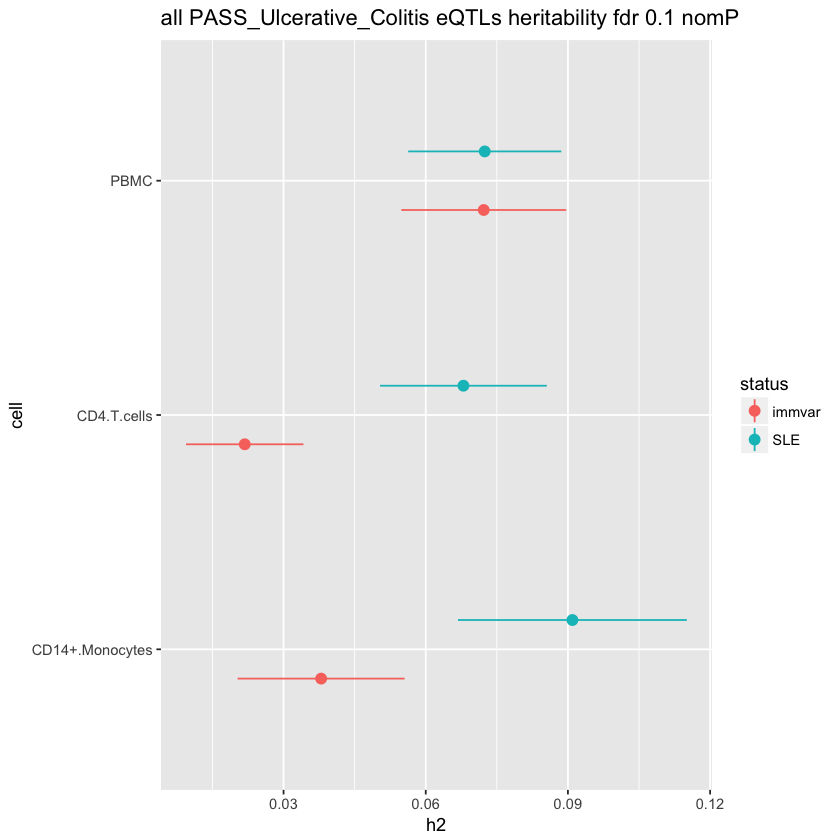

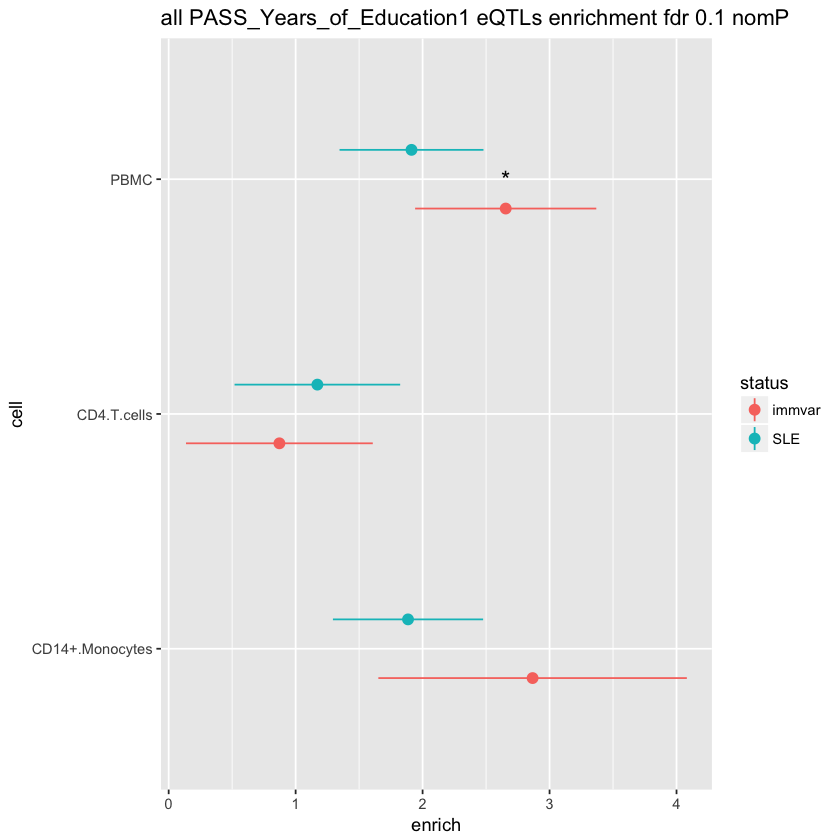

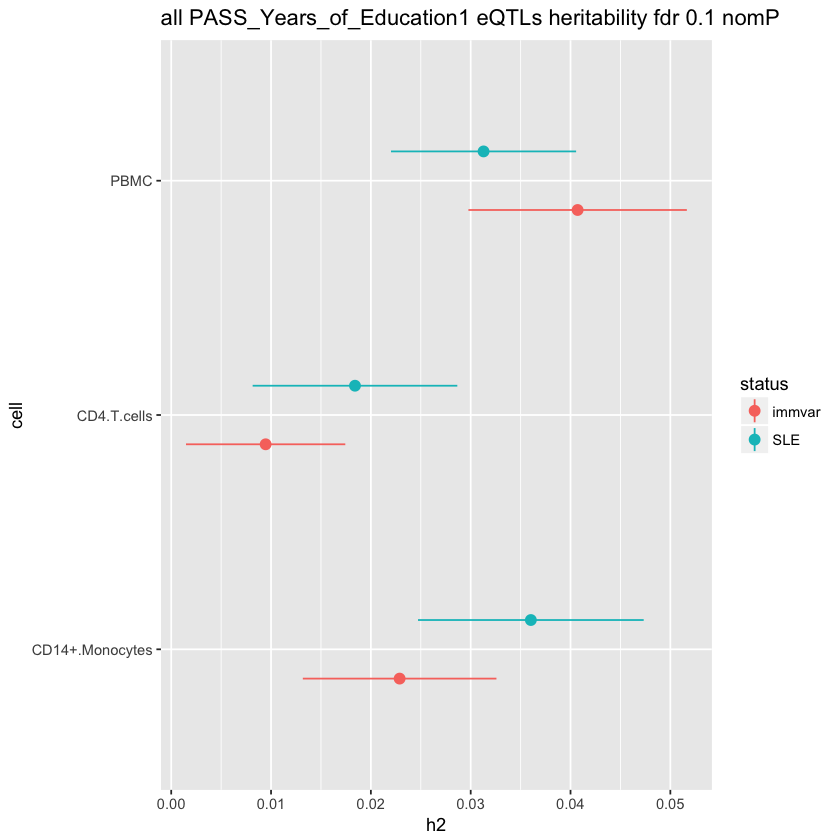

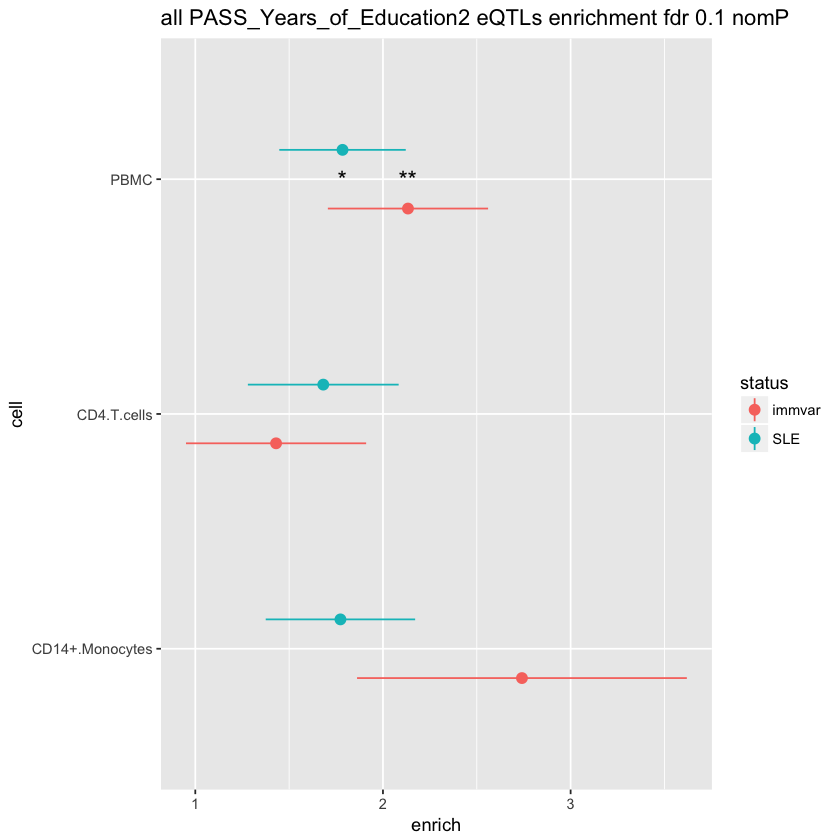

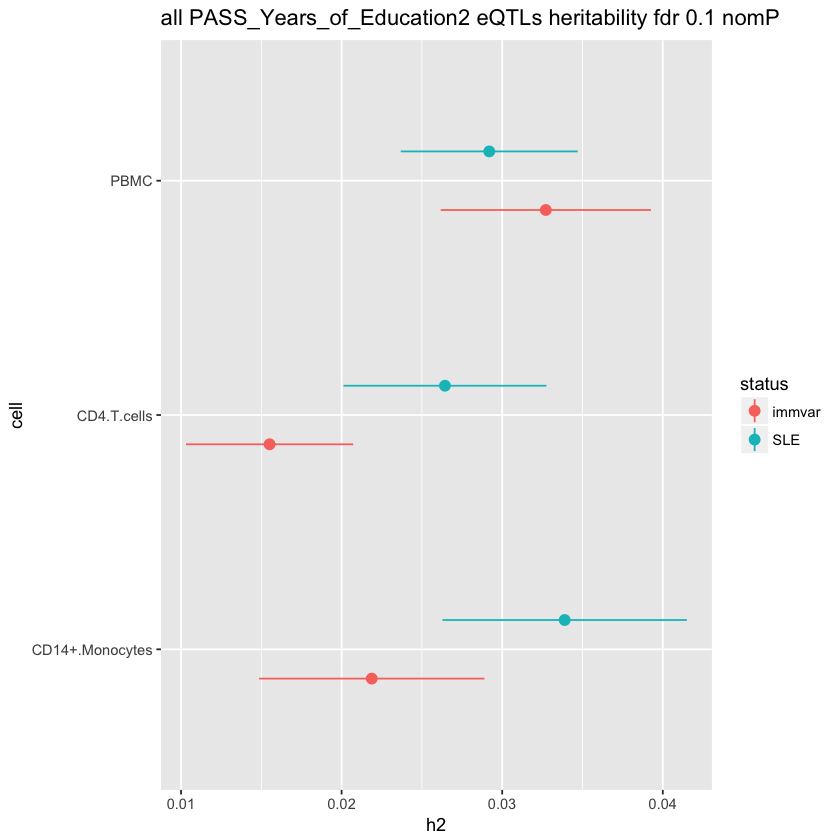

In [34]:
#look at dot plots each specific diseases

d=SLE.all_01$Disease
#d="PASS_Lupus"
#conds=c(IRF4,IRF1,all)

for (dis in d){
    
    #print(dotplots_enrich(SLE.1MB,SLE.1MB,dis,paste("all", dis, "eQTLs enrichment fdr 0.1 1MB")))
    #print(dotplots_enrich(SLE.all.meta,immvar.all.meta,dis,paste("all", dis, "eQTLs enrichment fdr 0.1 meta")))
    
    print(dotplots_enrich_single(SLE.1MB.nomP,immvar.1MB.nomP,dis,paste("all", dis, "eQTLs enrichment fdr 0.1 nomP")))
    
    #print(dotplots_enrich(SLE.all_01,immvar.all_01,dis,paste("all", dis, "eQTLs enrichment fdr 0.1")))
    
    
    #print(dotplots_h2(SLE.1MB,SLE.1MB,dis,paste("all", dis, "eQTLs heritability fdr 0.1 1MB")))
    #print(dotplots_h2(SLE.all.meta,immvar.all.meta,dis,paste("all", dis, "eQTLs heritability fdr 0.1 meta")))
    
    print(dotplots_h2_single(SLE.1MB.nomP,immvar.1MB.nomP,dis,paste("all", dis, "eQTLs heritability fdr 0.1 nomP")))
    
    #print(dotplots_h2(SLE.all_01,immvar.all_01,dis,paste("all", dis, "eQTLs heritability fdr 0.1")))
    
    
    #print(dotplots_enrich(SLE.all_02,immvar.all_02,dis,paste("all", dis, " eQTLs enrichment fdr 0.2")))
    #print(dotplots_h2(SLE.all_02,immvar.all_02,dis,paste("all", dis, " eQTLs heritability fdr 0.2")))
    #print(dotplots_enrich(SLE.all_05,immvar.all_05,dis,paste("all", dis, " eQTLs enrichment fdr 0.5")))
    #print(dotplots_h2(SLE.all_05,immvar.all_05,dis,paste("all", dis, " eQTLs heritability fdr 0.5")))
    
    
    #print(dotplots_enrich(SLE.IRF4.full,immvar.IRF4.full,dis,paste(dis,"IRF4 enrichment fdr 0.1")))
    #print(dotplots_h2(SLE.IRF4.full,immvar.IRF4.full,dis,"IRF4 heritability fdr 0.1"))

    #print(dotplots_enrich(SLE.IRF1.full,immvar.IRF1.full,dis,paste(dis,"IRF1 enrichment fdr 0.1")))
    #print(dotplots_h2(SLE.IRF1.full,immvar.IRF1.full,dis,paste(dis,"IRF1 heritability fdr 0.1")))

    #print(dotplots_enrich(SLE.all,immvar.all,dis,paste(dis,"all eQTLs enrichment fdr 0.1")))
    #print(dotplots_h2(SLE.all,immvar.all,dis,paste(dis,"all eQTLs heritability fdr 0.1")))
}
#dotplots_enrich(SLE.IRF4.full,immvar.IRF4.full,"PASS_Lupus","IRF4 Lupus enrichment fdr 0.1")
#dotplots_h2(SLE.IRF4.full,immvar.IRF4.full,"PASS_Lupus","IRF4 Lupus heritability fdr 0.1")

#dotplots_enrich(SLE.IRF1.full,immvar.IRF1.full,"PASS_Lupus","IRF1 Lupus enrichment fdr 0.1")
#dotplots_h2(SLE.IRF1.full,immvar.IRF1.full,"PASS_Lupus","IRF1 Lupus heritability fdr 0.1")

#dotplots_enrich(SLE.all,immvar.all,"PASS_Lupus","all eQTLs Lupus enrichment fdr 0.1")
#dotplots_h2(SLE.all,immvar.all,"PASS_Lupus","all eQTLs Lupus heritability fdr 0.1")



#dotplots_enrich(SLE.IRF4.full,immvar.IRF4.full,"PASS_Autism","IRF4 Autism enrichment fdr 0.1")
#dotplots_h2(SLE.IRF4.full,immvar.IRF4.full,"PASS_Rheumatoid_Arthritis","IRF4 RA heritability fdr 0.1")

#dotplots_enrich(SLE.IRF1.full,immvar.IRF1.full,"PASS_Autism","IRF1 Autism enrichment fdr 0.1")
#dotplots_h2(SLE.IRF4.full,immvar.IRF4.full,"PASS_BMI1","IRF4 BMI heritability fdr 0.1")


#d="PASS_Multiple_sclerosis"
#dotplots_enrich(SLE.all_01,immvar.all_01,d,paste("all", d, "eQTLs enrichment fdr 0.1"))
#dotplots_h2(SLE.all_01,immvar.all_01,d,paste("all", d, "eQTLs heritability fdr 0.1"))
#dotplots_enrich(SLE.all_02,immvar.all_02,d,paste("all", d, " eQTLs enrichment fdr 0.2"))
#dotplots_h2(SLE.all_02,immvar.all_02,d,paste("all", d, " eQTLs heritability fdr 0.2"))
#dotplots_enrich(SLE.all_05,immvar.all_05,d,paste("all", d, " eQTLs enrichment fdr 0.5"))
#dotplots_h2(SLE.all_05,immvar.all_05,d,paste("all", d, " eQTLs heritability fdr 0.5"))



In [5]:
##modified scripts for heatmaps to take full file
##Plotting function for all cell heatmap
heatmap_all_cells_full<- function(plotdata,title){
    #create dataframe for plotting
    enrich.data=plotdata[c(1,5,11,17,23,29,35,41,47,53)]
    sig.data=plotdata[c(1,7,13,19,25,31,37,43,49,55)]
    #enrich.data=plotdata[c(1,2,4,6,8,10,12,14,16,18)]
    #sig.data=plotdata[c(1,3,5,7,9,11,13,15,17,19)]
    lab=c("disease","Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC")
    #lab=c("disease","Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells")
    colnames(enrich.data)=lab
    colnames(sig.data)=lab
    #sig=melt(data = sig.data, id.vars = "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells"),value.name = "pvalue",variable.name="cell")
    #enrich=melt(data = enrich.data, id.vars= "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells"), value.name = "enrichment",variable.name="cell")
    sig=melt(data = sig.data, id.vars = "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "pvalue",variable.name="cell")
    enrich=melt(data = enrich.data, id.vars= "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"), value.name = "enrichment",variable.name="cell")
    
    
    #merge dfs
    df=merge(enrich,sig)
    
    #cluster data
    den=as.dendrogram(hclust( dist(plotdata, method = "euclidean"), method = "ward.D" ))
    ordr=order.dendrogram(den)
    dendro.plot <- ggdendrogram(data = den, labels=FALSE, leaf_labels=FALSE,rotate = TRUE,axes=F)
    
    #label significance 
    df$star <- cut(df$pvalue, breaks=c(-Inf, 0.00019, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))
    #df$star <- cut(df$pvalue, breaks=c(-Inf, 0.0000000002, 0.00000002, 0.000002, Inf), label=c("***", "**", "*", ""))
    
    df_clust=df[ordr,]
    df$disease <-factor(x=df$disease, levels=enrich.data$disease[ordr],ordered=TRUE)
    #df$disease <-factor(x=df$disease, levels=enrich.data$disease[ordr],ordered=TRUE)
    
    #plot
    grid.newpage()
    heatmap.plot=ggplot(data = df, aes(x = cell, y = disease)) +ggtitle(title)+
    geom_tile(aes(fill = enrichment)) +scale_fill_gradient(low = "blue", high = "red")+labs(fill = "Enrichment")+geom_text(aes(label=star), color="black", size=3)+theme(axis.text.x=element_text(angle=90,hjust=1))
    
    #geom_tile(aes(fill = enrichment)) +scale_fill_gradient(low = "blue", high = "red",limits=c(-50,50))+labs(fill = "Enrichment")+geom_text(aes(label=star), color="black", size=3)+theme(axis.text.x=element_text(angle=90,hjust=1))
    
    
    print(heatmap.plot, vp = viewport(x = 0.4, y = 0.5, width = 0.8, height = 1.0),labels=FALSE)
    plot(dendro.plot, axes=FALSE,vp = viewport(x = 0.9, y = 0.56, width = 0.2, height = 0.88))
}


In [120]:
##Plotting function for all cell heatmap
heatmap_all_3_cells<- function(plotdata,title){
    #create dataframe for plotting
    #enrich.data=plotdata[c(1,2,4,6,8,10,12,14,16)]
    #sig.data=plotdata[c(1,3,5,7,9,11,13,15,17)]
    enrich.data=plotdata[c(1,5,11,17)]
    sig.data=plotdata[c(1,7,13,19)]
    

    lab=c("disease","CD14+.Monocytes","CD4.T.cells","PBMC")
    #lab=c("disease","Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells")
    colnames(enrich.data)=lab
    colnames(sig.data)=lab
    #sig=melt(data = sig.data, id.vars = "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells"),value.name = "pvalue",variable.name="cell")
    #enrich=melt(data = enrich.data, id.vars= "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells"), value.name = "enrichment",variable.name="cell")
    #sig=melt(data = sig.data, id.vars = "disease", measure.vars = c("CD14+.Monocytes","CD4.T.cells","PBMC"),value.name = "pvalue",variable.name="cell")
    #enrich=melt(data = enrich.data, id.vars= "disease", measure.vars = c("CD14+.Monocytes","CD4.T.cells","PBMC"), value.name = "enrichment",variable.name="cell")
    
    sig=melt(data = sig.data, id.vars = "disease", measure.vars = c("CD4.T.cells","CD14+.Monocytes","PBMC"),value.name = "pvalue",variable.name="cell")
    enrich=melt(data = enrich.data, id.vars= "disease", measure.vars = c("CD4.T.cells","CD14+.Monocytes","PBMC"), value.name = "enrichment",variable.name="cell")
    
    
    #merge dfs
    df=merge(enrich,sig)
    
    #cluster data
    den=as.dendrogram(hclust( dist(plotdata, method = "euclidean"), method = "ward.D" ))
    ordr=order.dendrogram(den)
    dendro.plot <- ggdendrogram(data = den, labels=FALSE, leaf_labels=FALSE,rotate = TRUE,axes=F)
    
    #label significance 
    df$star <- cut(df$pvalue, breaks=c(-Inf, 0.0006, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))
    #df$star <- cut(df$pvalue, breaks=c(-Inf, 0.0000000002, 0.00000002, 0.000002, Inf), label=c("***", "**", "*", ""))
    
    df_clust=df[ordr,]
    df$disease <-factor(x=df$disease, levels=enrich.data$disease[ordr],ordered=TRUE)
    #df$disease <-factor(x=df$disease, levels=enrich.data$disease[ordr],ordered=TRUE)
    
    #plot
    grid.newpage()
    heatmap.plot=ggplot(data = df, aes(x = cell, y = disease)) +ggtitle(title)+
    geom_tile(aes(fill = enrichment)) +scale_fill_gradient(low = "blue", high = "red")+labs(fill = "Enrichment")+geom_text(aes(label=star), color="black", size=3)+theme(axis.text.x=element_text(angle=90,hjust=1))
    
    #geom_tile(aes(fill = enrichment)) +scale_fill_gradient(low = "blue", high = "red",limits=c(-50,50))+labs(fill = "Enrichment")+geom_text(aes(label=star), color="black", size=3)+theme(axis.text.x=element_text(angle=90,hjust=1))
    
    
    print(heatmap.plot, vp = viewport(x = 0.4, y = 0.5, width = 0.8, height = 1.0),labels=FALSE)
    plot(dendro.plot, axes=FALSE,vp = viewport(x = 0.9, y = 0.56, width = 0.2, height = 0.88))
}

Disease               Tc_PBMC     Tc_CD4     Tc_CD14     Tc_WB       
1 PASS_Alzheimer        -0.29805201 -1.3704216   0.2842575  0.004122081
2 PASS_Anorexia         -0.07503417  0.6474412  -0.2832121 -0.561563862
3 PASS_Autism            0.09226400  1.5535514 -10.8901778  0.506053197
4 PASS_Bipolar_Disorder  1.09251861 -0.8764477  -0.2487716  0.133420848
5 PASS_BMI1             -0.05804888  0.2771428   0.2424842  0.002381646
6 PASS_Celiac           -2.12309438  1.4018834  -0.2218714  0.423433750

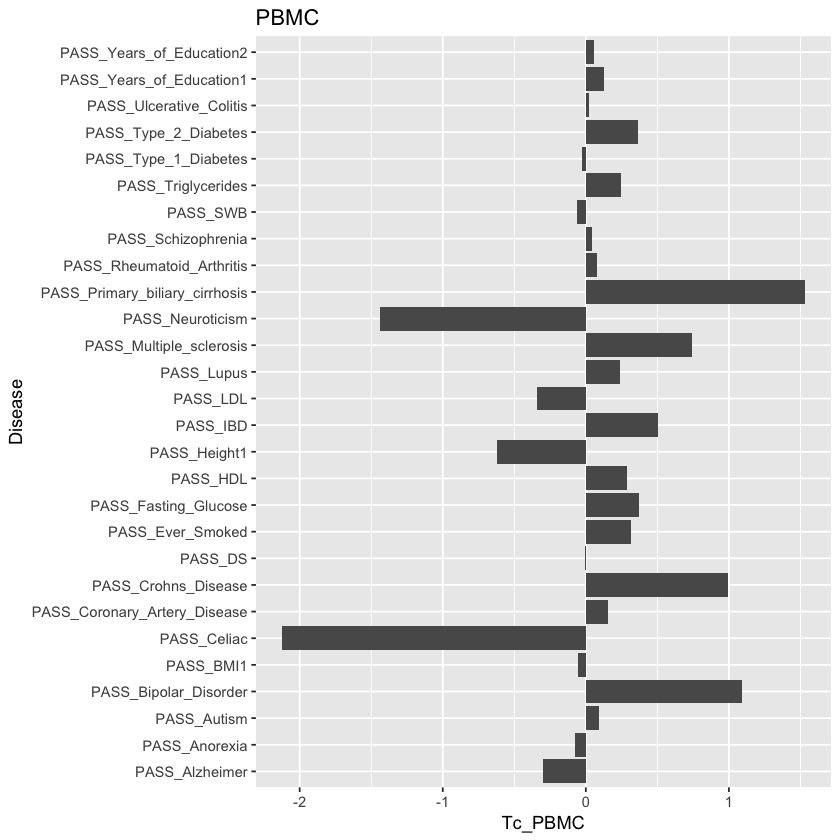

Warning message:
“Removed 1 rows containing missing values (position_stack).”

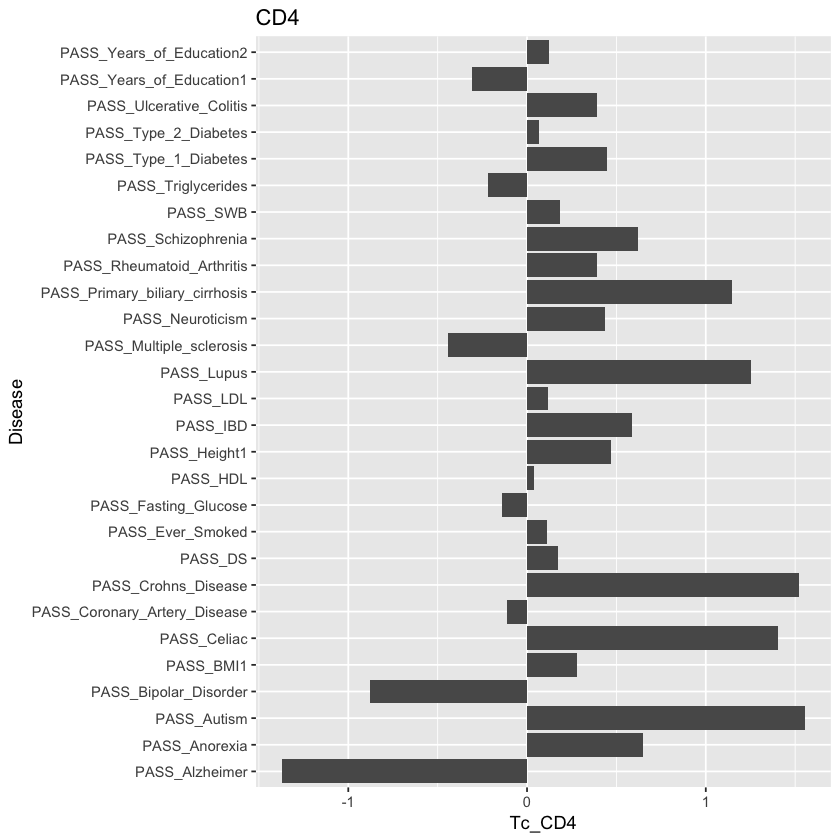

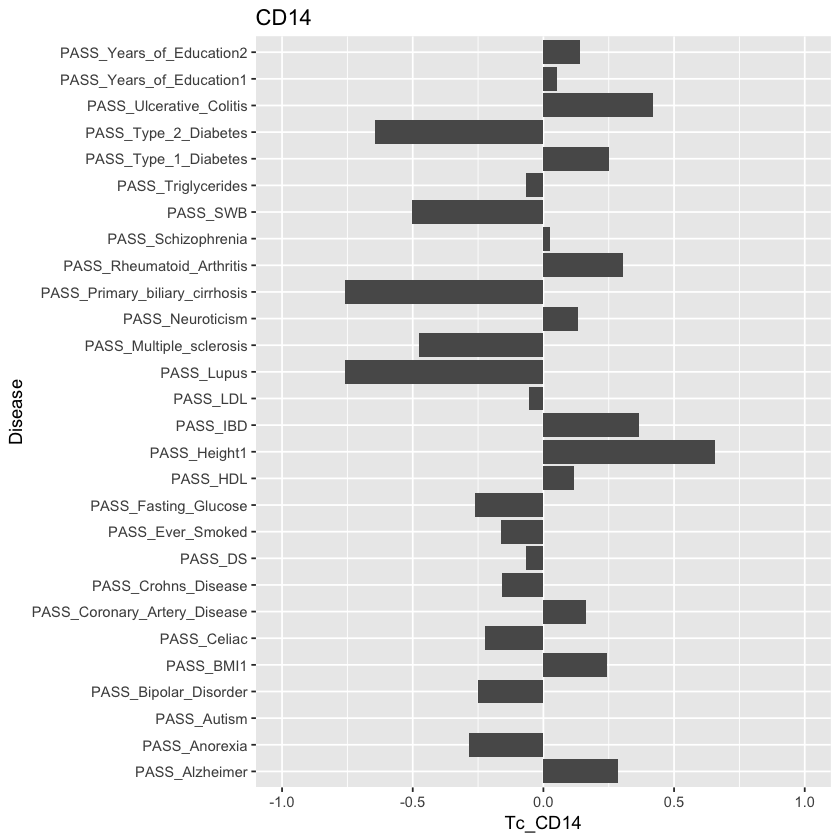

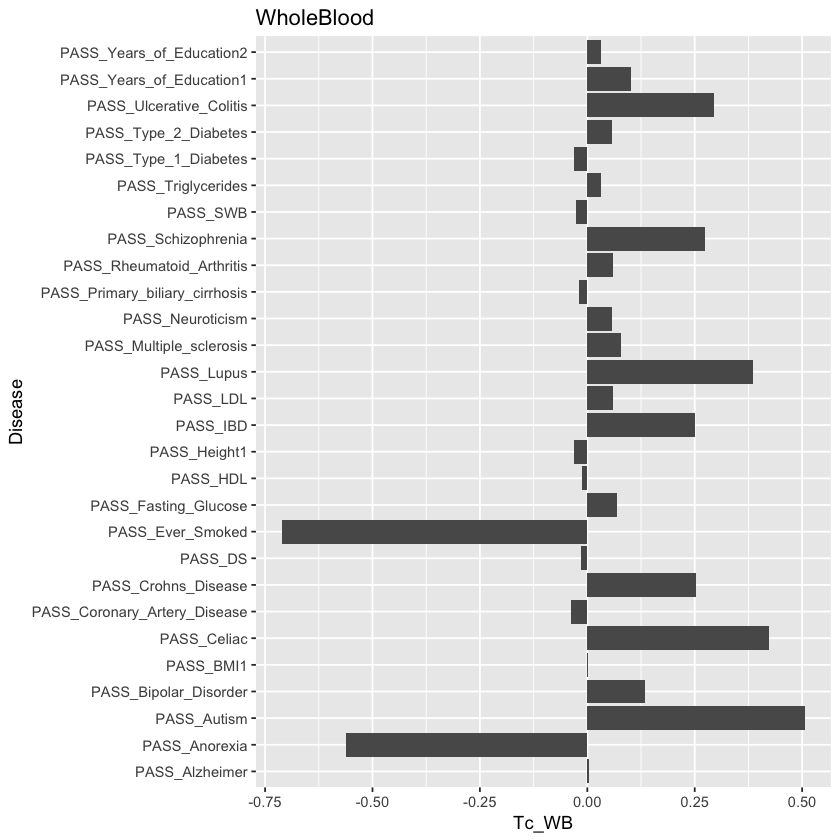

In [116]:
##calcluate corrected Tau
## Tc*=Tc*sd(annot)/(hg2/M)
#M is number GWAS individuals

CD14=115381
CD4=95027
PBMC=98798
WB=412262

calc_normalized_tau<- function(df,annot_snps,cell){
    
    if(cell=="PBMC"){
        posc=26
        posh=21
    }
    if(cell=="CD14"){
        posc=17
        posh=12
    }
    if(cell=="CD4"){
        posc=8
        posh=3
    }
    if(cell=="WB"){
        posc=35
        posh=30
    }
    #GWAS_inds=c(54162,32143,10263,16731,118122,15283,56423,20883,161460,74035,46186,86437,125107,34652,82170,14267,27148,170911,13239,25604,70100,298420,82990,26890,48762,27432,126559,328917)
    #possible number of snps to annotate
    total_snps=9997253
    #annot_snps=98798
    one=rep(1,annot_snps)
    zero=rep(0,total_snps-annot_snps)
    std=sd(c(one,zero))

    #get coef
    #head(SLE.joint.1MB.nomP)
    #coef=SLE.joint.1MB.nomP$PBMC.coef
    #h2=SLE.joint.1MB.nomP$PBMC.Prop._h2
    
    coef=df[posc]
    h2=df[posh]
    

    Tc=(coef*std*5961159)/(h2)
    #Tc=(coef*std)/(h2/GWAS_inds)
    #print(cbind(SLE.joint.1MB.nomP$Disease,data.frame(Tc)))
    
    return(data.frame(Tc))
    
}

Tc_PBMC=calc_normalized_tau(SLE.joint.1MB.nomP.WB,PBMC,"PBMC")
Tc_CD4=calc_normalized_tau(SLE.joint.1MB.nomP.WB,PBMC,"CD4")
Tc_CD14=calc_normalized_tau(SLE.joint.1MB.nomP.WB,PBMC,"CD14")
Tc_WB=calc_normalized_tau(SLE.joint.1MB.nomP.WB,WB,"WB")

tau=cbind(SLE.joint.1MB.nomP.WB$Disease,Tc_PBMC,Tc_CD4,Tc_CD14,Tc_WB)
colnames(tau)=c("Disease","Tc_PBMC","Tc_CD4","Tc_CD14","Tc_WB")

write.table(tau, file="Tau_joint_PBMC_CD4_CD14_WB_Baseine.txt",sep="\t",quote=FALSE,row.names=FALSE)
    
head(tau)
ggplot(tau, aes(x=Disease,y=Tc_PBMC)) + geom_bar(stat="identity")+ coord_flip()+ggtitle("PBMC")
ggplot(tau, aes(x=Disease,y=Tc_CD4)) + geom_bar(stat="identity")+ coord_flip()+ggtitle("CD4")
ggplot(tau, aes(x=Disease,y=Tc_CD14)) + geom_bar(stat="identity")+ coord_flip()+ggtitle("CD14")+ylim(c(-1,1))
ggplot(tau, aes(x=Disease,y=Tc_WB)) + geom_bar(stat="identity")+ coord_flip()+ggtitle("WholeBlood")


#SLE.joint.1MB.nomP$PBMC.coef
#SLE.joint.1MB.nomP[21]
#SLE.joint.1MB.nomP[3]
#SLE.joint.1MB.nomP.WB[35]



Warning message in dist(plotdata, method = "euclidean"):
“NAs introduced by coercion”

ERROR: Error in heatmap_all_cells_full(immvr.1MB, "immvar all annot 1MB fdr"): object 'immvr.1MB' not found


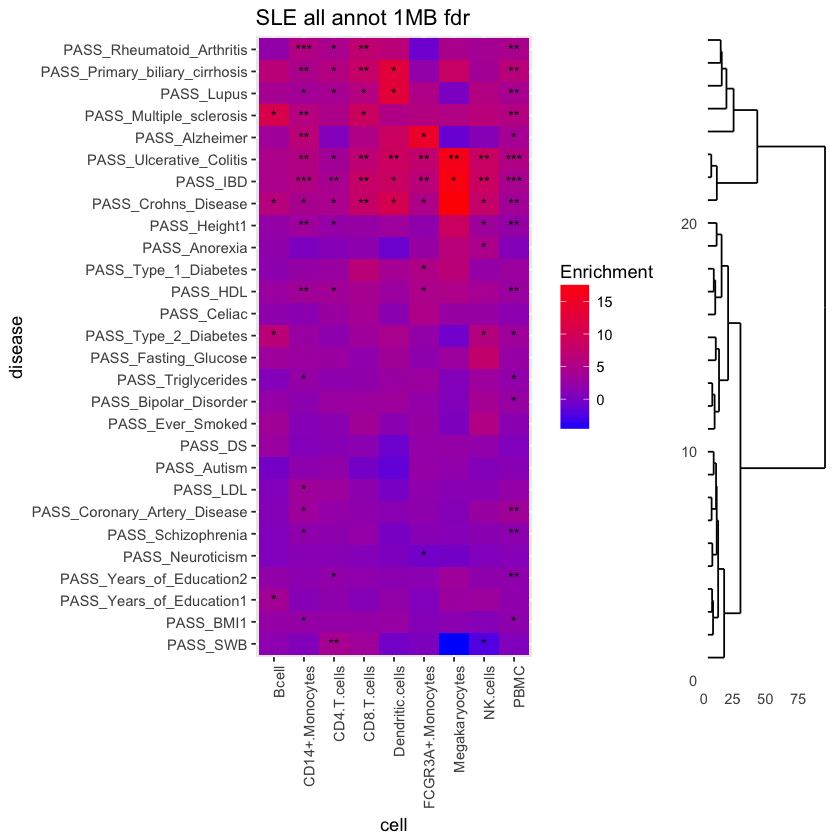

In [12]:
heatmap_all_cells_full(SLE.1MB,"SLE all annot 1MB fdr")
heatmap_all_cells_full(immvr.1MB,"immvar all annot 1MB fdr")

Warning message in dist(plotdata, method = "euclidean"):
“NAs introduced by coercion”Warning message in dist(plotdata, method = "euclidean"):
“NAs introduced by coercion”

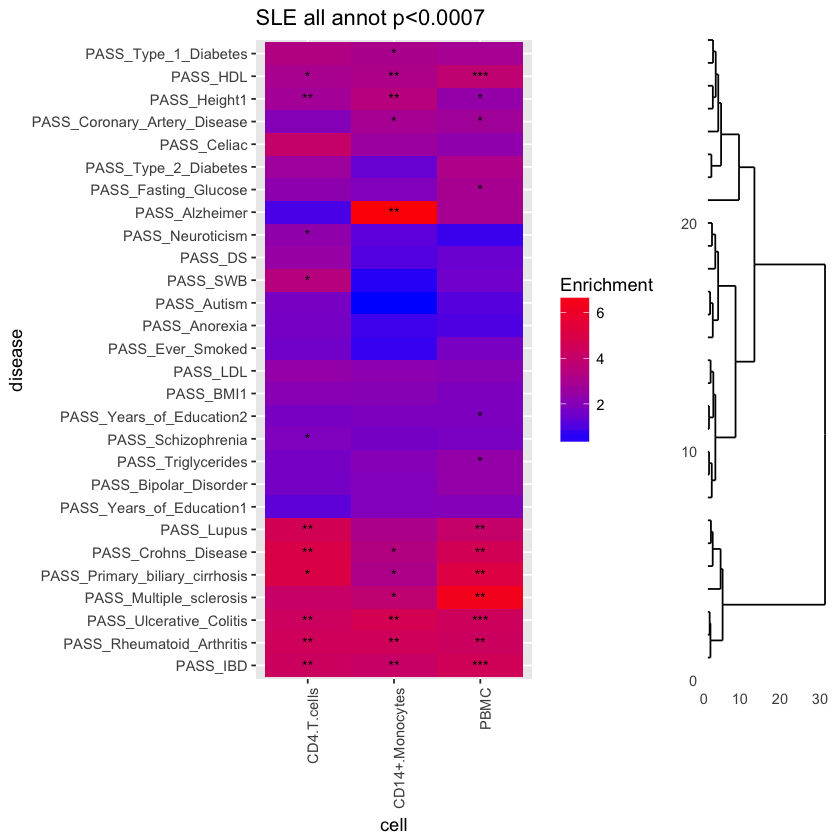

Warning message in dist(plotdata, method = "euclidean"):
“NAs introduced by coercion”

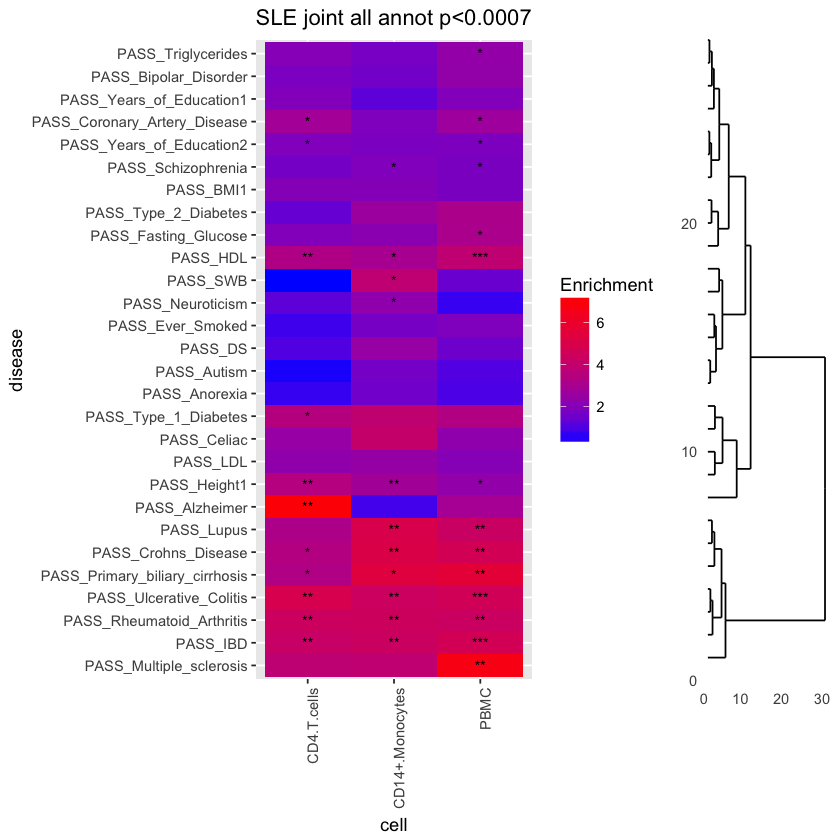

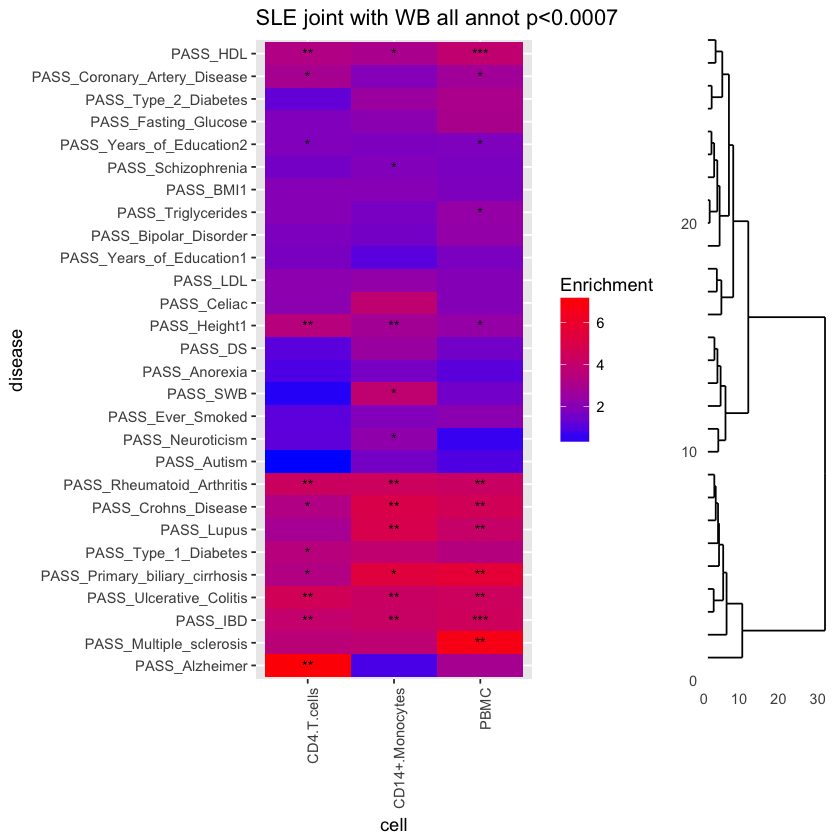

In [128]:
heatmap_all_3_cells(SLE.1MB.nomP, "SLE all annot p<0.0007")
#heatmap_all_3_cells(immvar.1MB.nomP, "immvar all annot p<0.0007")

drops=c("CD4.T.cells.coef","CD4.T.cells.coef_std_error","CD4.T.cells.coef_p","CD14..Monocytes.coef","CD14..Monocytes.coef_std_error","CD14..Monocytes.coef_p")
short_SLE.joint.1MB.nomP <- SLE.joint.1MB.nomP[,!(names(SLE.joint.1MB.nomP) %in% drops)]
short_SLE.joint.1MB.nomP.WB <- SLE.joint.1MB.nomP.WB[,!(names(SLE.joint.1MB.nomP.WB) %in% drops)]
#short_SLE.joint.1MB.nomP=SLE.joint.1MB.nomP[1:(length(SLE.joint.1MB.nomP)-3)]

heatmap_all_3_cells(short_SLE.joint.1MB.nomP, "SLE joint all annot p<0.0007, phase1")

heatmap_all_3_cells(short_SLE.joint.1MB.nomP.WB, "SLE joint with WB all annot p<0.0007 phase3")


#head(SLE.1MB.nomP)
#head(SLE.joint.1MB.nomP.WB)

cell            trait               Dtype  Tc.        Tc._se    Tc._pval  
1 CD4.T.cells     PASS_Celiac         immune 0.17745623 0.1899498 0.35018684
2 CD14+.Monocytes PASS_Celiac         immune 0.03954689 0.1222349 0.74629238
3 PBMC            PASS_Celiac         immune 0.04748141 0.1318367 0.71873263
4 CD4.T.cells     PASS_Crohns_Disease immune 0.34309042 0.1347607 0.01089890
5 CD14+.Monocytes PASS_Crohns_Disease immune 0.18572913 0.1163631 0.11046268
6 PBMC            PASS_Crohns_Disease immune 0.30512978 0.1233214 0.01335108
  WB_Tc.    lup
1 0.2361697 0  
2 0.2361697 0  
3 0.2361697 0  
4 0.1850304 0  
5 0.1850304 0  
6 0.1850304 0

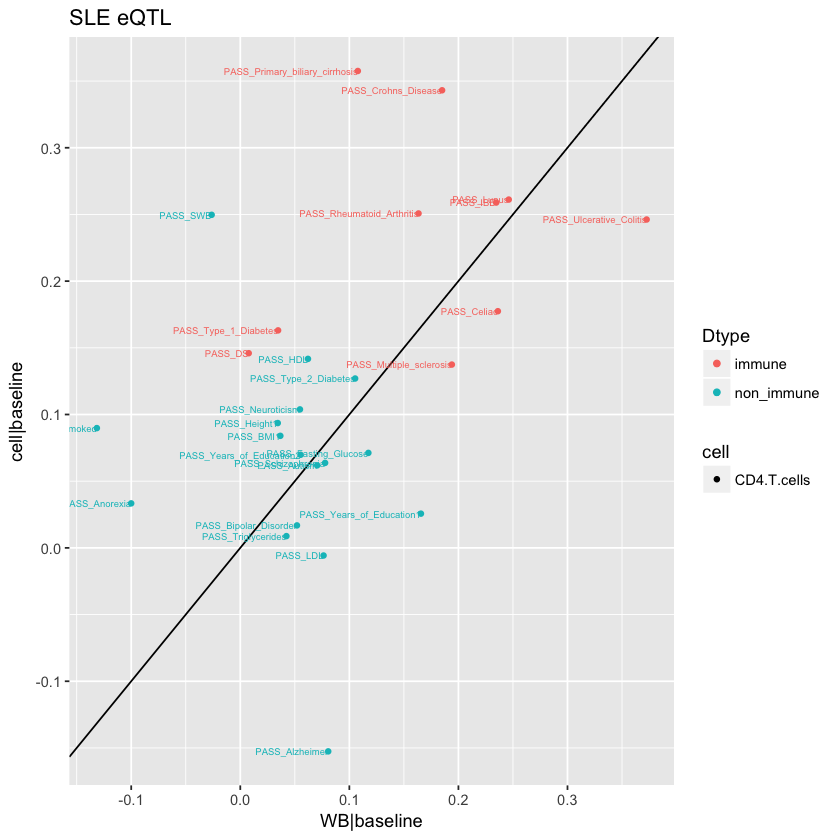

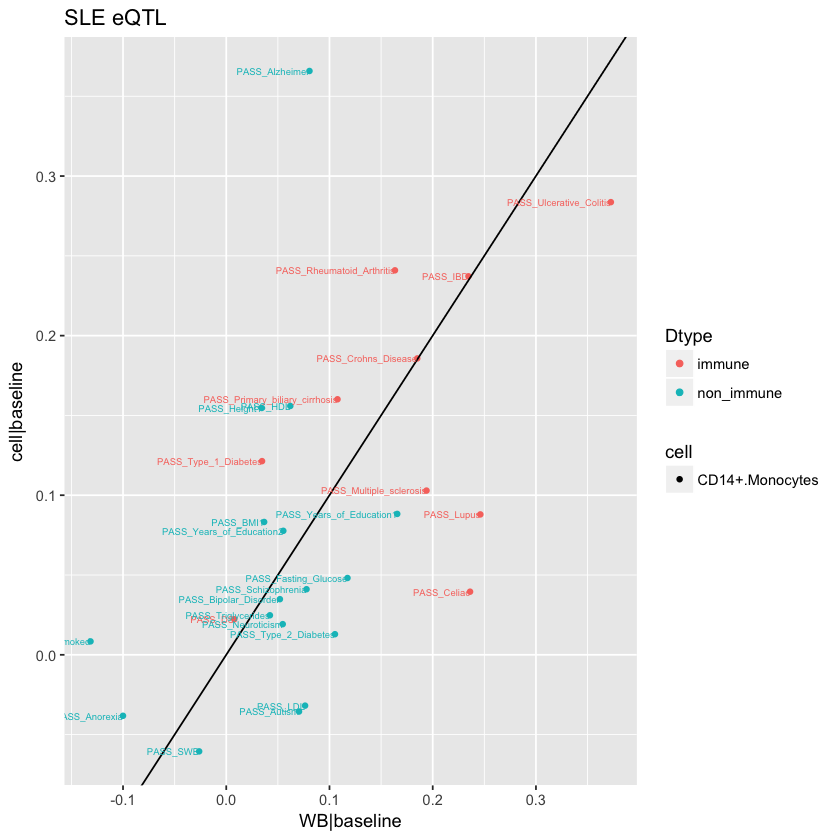

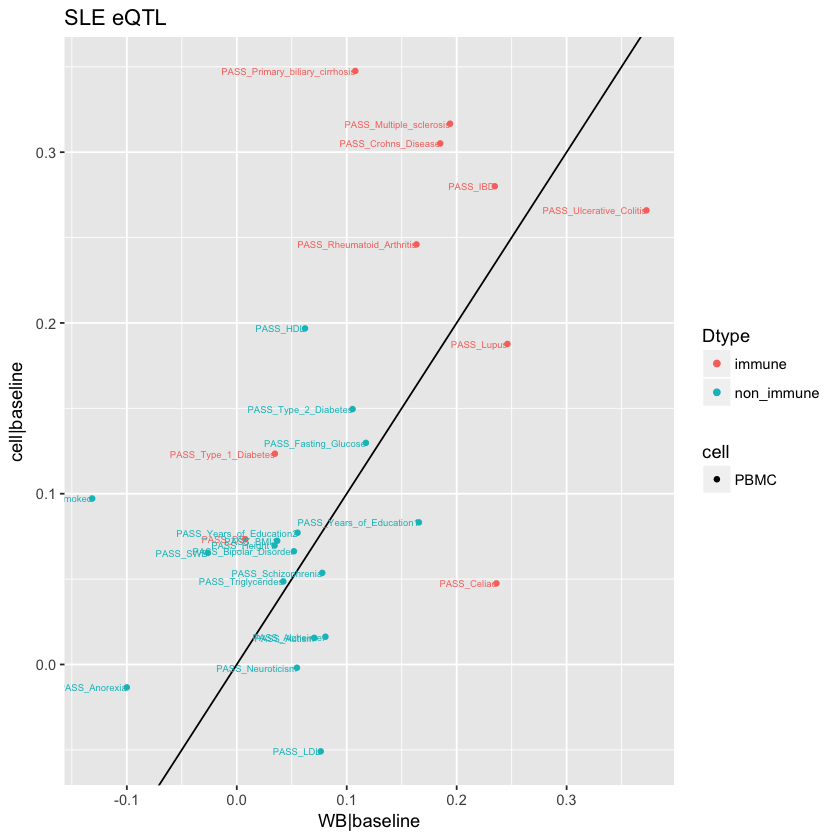

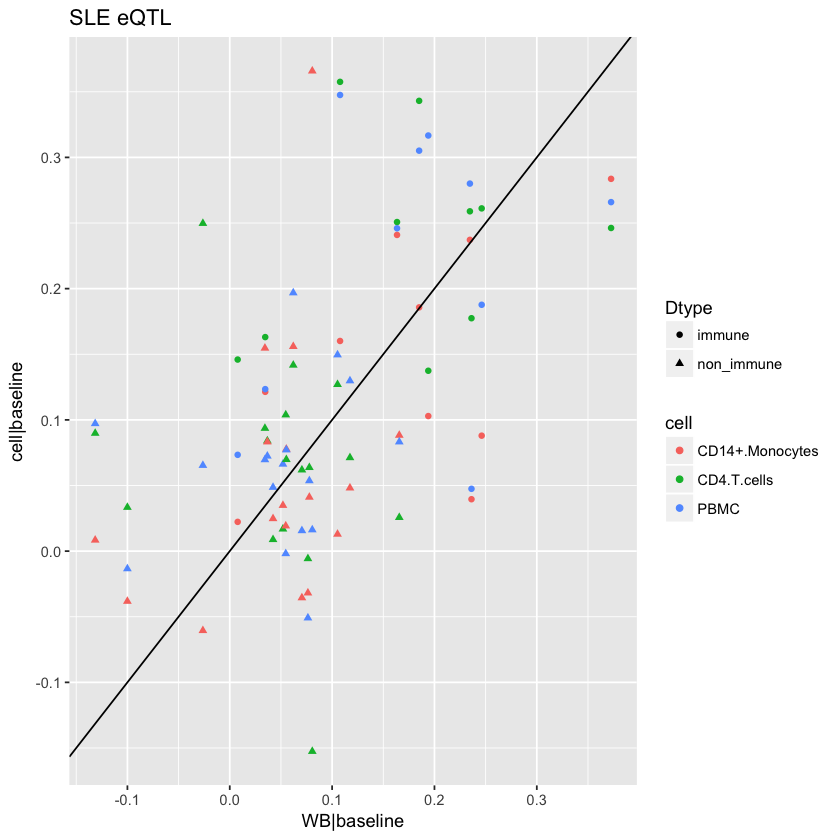

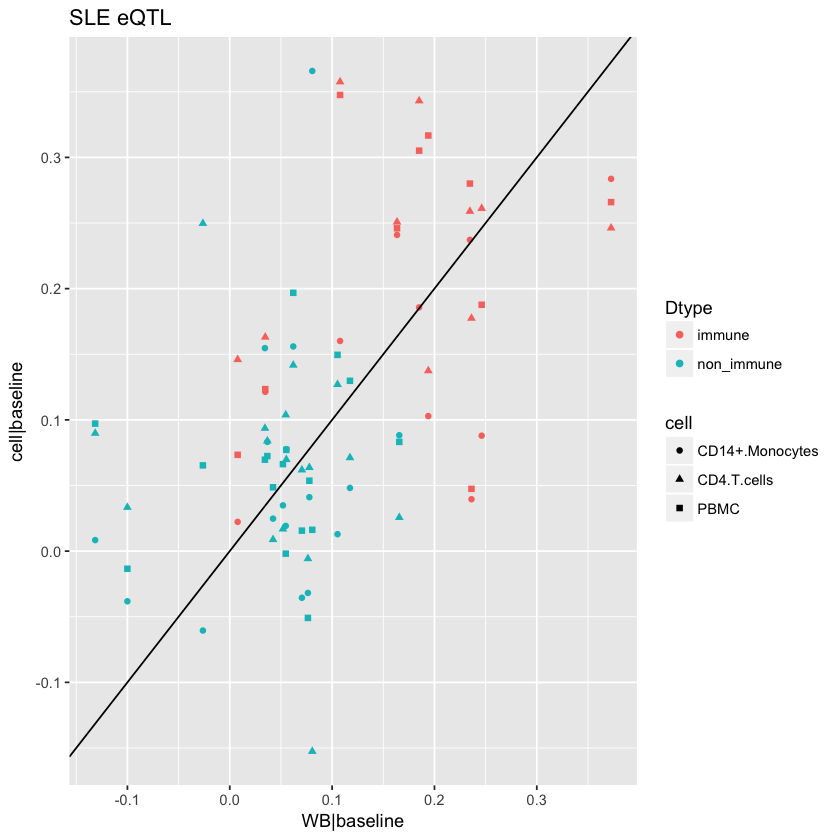

In [62]:
library(dplyr)
#plot tau's from partitioned H2 with SLE cell type specific eQTLs, each dot is a disease and we are only conditioning each cell on baseline.  
library(ggplot2)
library(reshape2)
library(grid)

df=read.table("/Users/student/Documents/YeLab/Lupus/all_disease_plot_df.txt",header=TRUE)

a=rep(0,12)
b=rep(0,(81-15))
lup=as.data.frame(c(a,"lupus","lupus","lupus",b))
colnames(lup)="lup"
df=cbind(df,lup)
head(df)

#for (x in unique(df$trait)){
for (x in unique(df$cell)){
    #print(x)
    tempDF=filter(df, cell == x)
    
    #p=ggplot(tempDF,aes(x=WB_Tc.,y=Tc., color=cell,shape=Dtype))+geom_point()+ggtitle(paste("SLE eQTL"))+xlab("WB|baseline")+ylab("cell|baseline")+geom_abline(slope=1,intercept=0)
    #+geom_text(aes(label=trait),size=2)

    e=ggplot(tempDF,aes(x=WB_Tc.,y=Tc., shape=cell,color=Dtype))+geom_point()+ggtitle(paste("SLE eQTL"))+xlab("WB|baseline")+ylab("cell|baseline")+geom_abline(slope=1,intercept=0)+geom_text(aes(label=trait), hjust=c(1),size=2)
    #print(p)
    print(e)
}
ggplot(df,aes(x=WB_Tc.,y=Tc., color=cell,shape=Dtype))+geom_point()+ggtitle(paste("SLE eQTL"))+xlab("WB|baseline")+ylab("cell|baseline")+geom_abline(slope=1,intercept=0)
#+geom_text(aes(label=trait),size=2)

ggplot(df,aes(x=WB_Tc.,y=Tc., shape=cell,color=Dtype))+geom_point()+ggtitle(paste("SLE eQTL"))+xlab("WB|baseline")+ylab("cell|baseline")+geom_abline(slope=1,intercept=0)
#+geom_text(aes(label=trait),size=2)




In [5]:
library(ggplot2)
library(reshape2)
library(grid)

##Tack on this code to the MetaTauGG.R code

header=c("cell","disease","Tc","Tc_meta_pval","Tc_se","enrich","enrich_meta_pval","enrich_se")

##hacky code that should be streamlined- results from metaTauGG.R 
###data for SLE eqtls
Tcell_I= c("CD4.T.cells","immune", 0.20,0.04,1.93e-06,4.06,0.42, 3.59e-14)
Mono_I=c("CD14.Monocytes","immune",	0.11,0.04, 3.38e-03, 3.31,0.42, 6.19e-09)
PBMC_I=c("PBMC","immune",0.16,0.04,3.38e-05,3.92,0.48, 3.42e-10)
Tcell_E= c("CD4.T.cells","non-immune", 0.06,0.02, 8.80e-04,1.94,0.16, 7.37e-09)
Mono_E=c("CD14.Monocytes","non-immune",	0.04,0.02,3.13e-02, 1.74,0.21,5.09e-04)
PBMC_E=c("PBMC","non-immune",0.05,0.02,3.48e-03, 1.86,0.17, 3.73e-07)

SLE_immune=data.frame(rbind(Tcell_I,Mono_I,PBMC_I))
SLE_non_immune=data.frame(rbind(Tcell_E,Mono_E,PBMC_E))

###data for immvar eqtls
Tcell_I= c("CD4.T.cells","immune", 0.0329167440921551,0.0393341819178705,0.402677832240441,2.64490645078991,0.474012638767575, 0.00052106435479106)
Mono_I=c("CD14.Monocytes","immune",	0.0608513850686133,0.0397422861618874, 0.125732426743004, 3.09004385019645,0.574012376415457, 0.000167574596560986)
PBMC_I=c("PBMC","immune",0.150668611679471,0.0502365835860784,0.00270706352725696,3.95978870528883,0.652956083011559, 4.31869810655445e-06)
Tcell_E= c("CD4.T.cells","non-immune", 0.00984907269841838,0.0155833189821001, 0.527369471296293,1.53616710109407,0.196673180264259, 0.00522691084127609)
Mono_E=c("CD14.Monocytes","non-immune",	0.0598902005775413,0.0200303195673722,0.00278998191093927, 2.34391843941473,0.283441776325947,2.65188736982191e-06)
PBMC_E=c("PBMC","non-immune",0.0274986478491804,0.01556692608759,0.0773155235973172, 1.75504203086019,0.17300458567265, 1.34677687158558e-05)

H_immune=data.frame(rbind(Tcell_I,Mono_I,PBMC_I))
H_non_immune=data.frame(rbind(Tcell_E,Mono_E,PBMC_E))

calcTau_plotting<- function(immune,non_immune,title){

    header=c("cell","disease","Tc","Tc_meta_pval","Tc_se","enrich","enrich_meta_pval","enrich_se")
    colnames(immune)=header
    colnames(non_immune)=header

    immune$Tc=as.numeric(as.character(immune$Tc))
    non_immune$Tc=as.numeric(as.character(non_immune$Tc))
    immune$Tc_se=as.numeric(as.character(immune$Tc_se))
    non_immune$Tc_se=as.numeric(as.character(non_immune$Tc_se))

    immune$enrich=as.numeric(as.character(immune$enrich))
    non_immune$enrich=as.numeric(as.character(non_immune$enrich))
    immune$enrich_se=as.numeric(as.character(immune$enrich_se))
    non_immune$enrich_se=as.numeric(as.character(non_immune$enrich_se))

    head(immune)
    head(non_immune)

    print(title)
    #plot tau
    grid.newpage()
    imm_plot_T=ggplot(data=immune,aes(x=cell,y=Tc))+geom_bar(stat="identity", fill="steelblue")+ylim(0,0.6)+geom_errorbar(aes(ymin=Tc,ymax=Tc+Tc_se), width=.2,position=position_dodge(.9))+theme_minimal()+theme(axis.text.x=element_text(angle=90,hjust=1))+labs(title="Meta Immune", x="cell type", y = "Tc*")
    no_imm_plot_T=ggplot(data=non_immune,aes(x=cell,y=Tc))+geom_bar(stat="identity", fill="red")+ylim(0,0.6)+theme_minimal()+geom_errorbar(aes(ymin=Tc,ymax=Tc+Tc_se), width=.2,position=position_dodge(.9))+theme(axis.text.x=element_text(angle=90,hjust=1))+labs(title="Meta Non-Immune", x="cell type", y = "Tc*")
    print(imm_plot_T, vp = viewport(x = 0.25, y = 0.5, width = 0.5, height = 1.0),labels=FALSE)
    plot(no_imm_plot_T, axes=FALSE,vp = viewport(x = 0.75, y = 0.5, width = 0.5, height = 1.0))
    
    #plot enrich
    grid.newpage()
    imm_plot_E=ggplot(data=immune,aes(x=cell,y=enrich))+geom_bar(stat="identity", fill="steelblue")+ylim(0,5)+geom_errorbar(aes(ymin=enrich-enrich_se, ymax=enrich+enrich_se), width=.2,position=position_dodge(.9))+theme_minimal()+theme(axis.text.x=element_text(angle=90,hjust=1))+labs(title="Meta Immune", x="cell type", y = "Enrichment")
    no_imm_plot_E=ggplot(data=non_immune,aes(x=cell,y=enrich))+geom_bar(stat="identity", fill="red")+ylim(0,5)+theme_minimal()+geom_errorbar(aes(ymin=enrich-enrich_se, ymax=enrich+enrich_se), width=.2,position=position_dodge(.9))+theme(axis.text.x=element_text(angle=90,hjust=1))+labs(title="Meta Non-Immune", x="cell type", y = "Enrichment")
    print(imm_plot_E, vp = viewport(x = 0.25, y = 0.5, width = 0.5, height = 0.9),labels=FALSE)
    plot(no_imm_plot_E, axes=FALSE,vp = viewport(x = 0.75, y = 0.5, width = 0.5, height = 0.9))
}






[1] "SLE eQTLs"


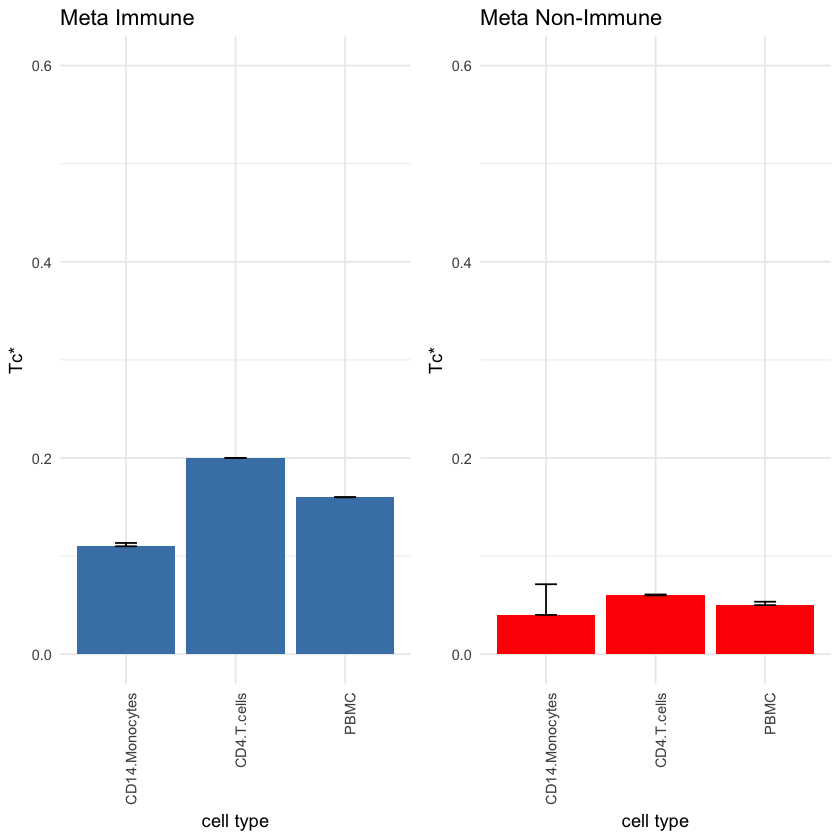

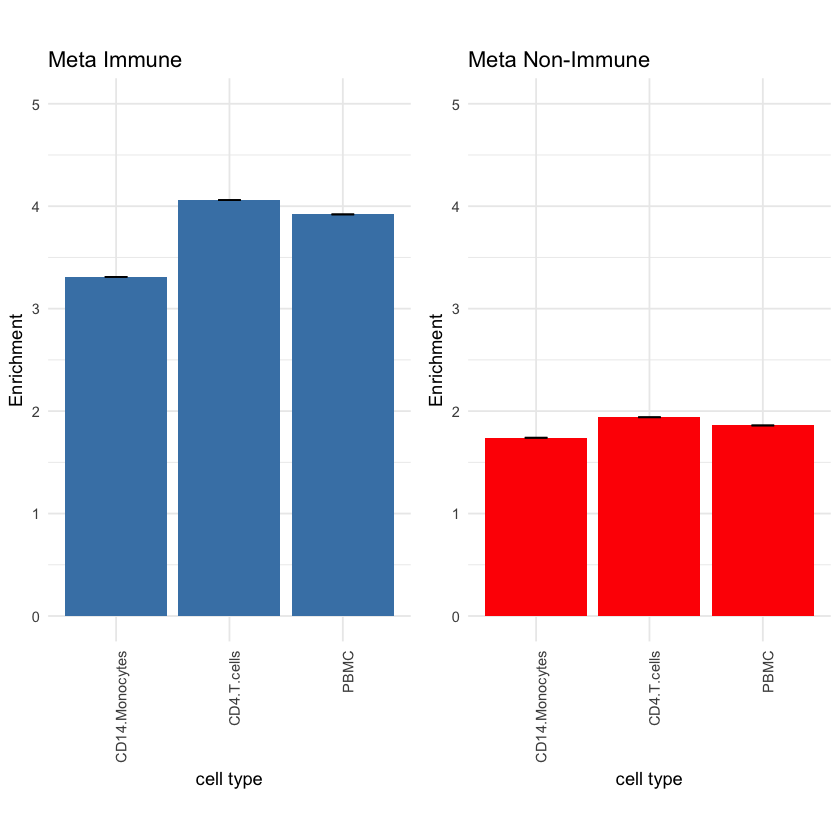

In [6]:
calcTau_plotting(SLE_immune,SLE_non_immune,"SLE eQTLs")





[1] "immvar eQTLs"


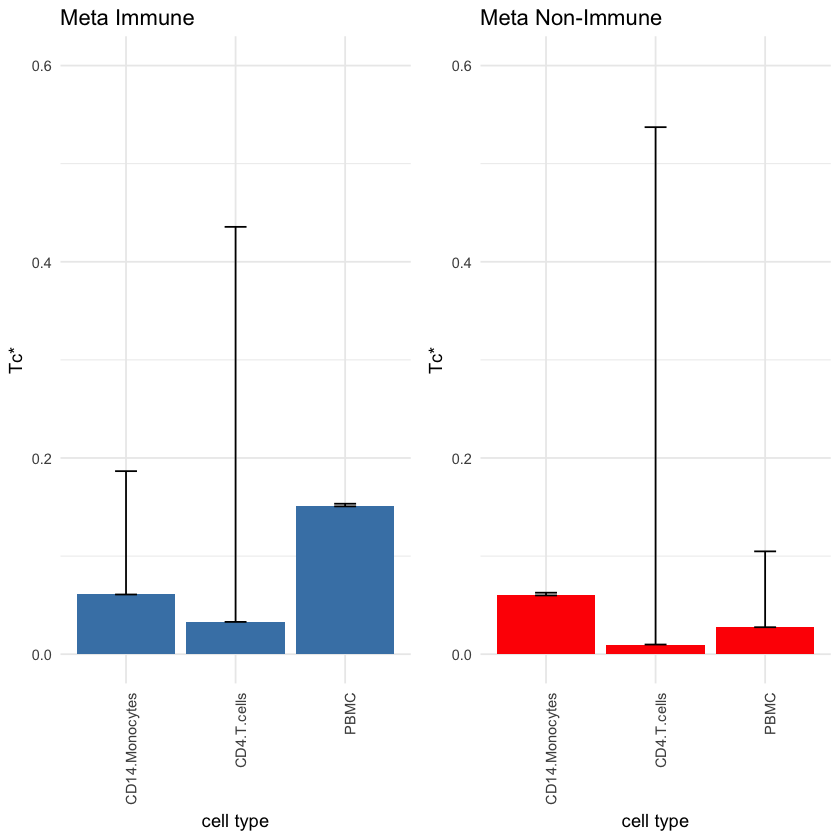

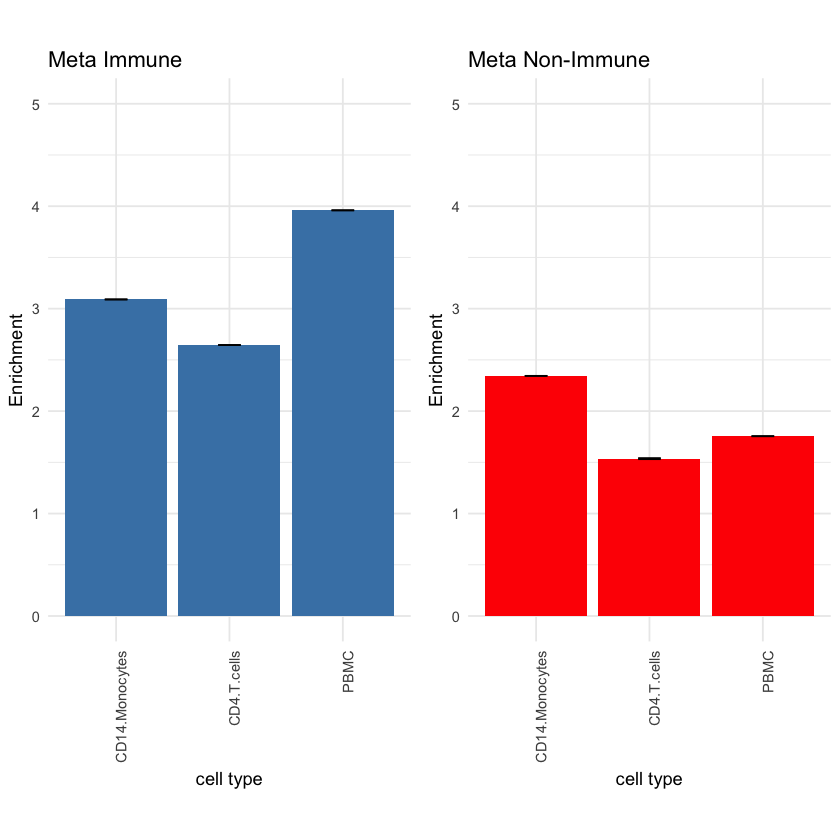

In [7]:
calcTau_plotting(H_immune,H_non_immune, "immvar eQTLs")

